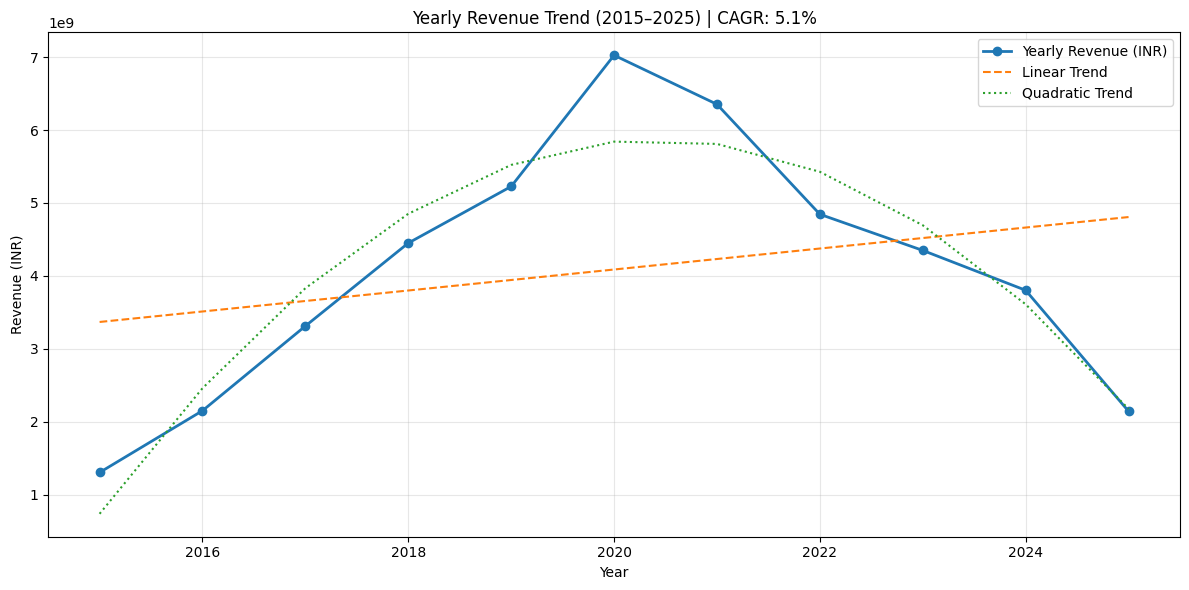

✅ Yearly revenue analysis complete. Saved to yearly_revenue_trend.png & yearly_revenue_summary.csv


C:\Users\Alagu\AppData\Local\Temp\ipykernel_9812\2424851182.py:73: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales = df.groupby(['year','month_name'], as_index=False)['final_amount_inr'].sum()


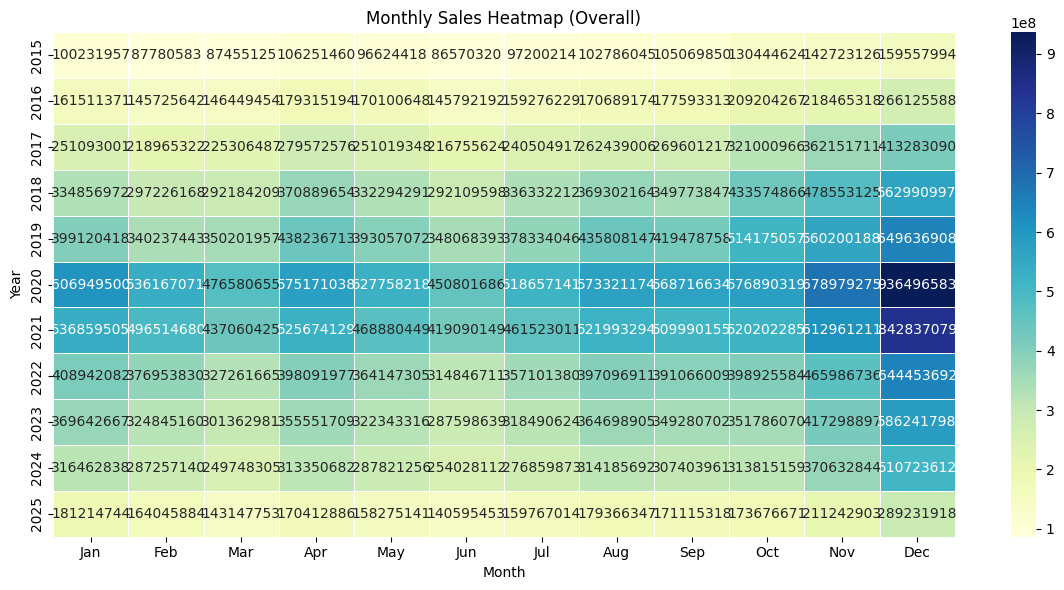


📊 Peak Selling Month per Year:
     Peak Month  Revenue (INR)
year                          
2015        Dec      159557994
2016        Dec      266125588
2017        Dec      413283090
2018        Dec      562990997
2019        Dec      649636908
2020        Dec      936496583
2021        Dec      842837079
2022        Dec      644453692
2023        Dec      586241798
2024        Dec      510723612
2025        Dec      289231918


C:\Users\Alagu\AppData\Local\Temp\ipykernel_9812\2424851182.py:93: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_monthly = df.groupby(['category','year','month_name'], as_index=False)['final_amount_inr'].sum()
C:\Users\Alagu\AppData\Local\Temp\ipykernel_9812\2424851182.py:95: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=cat_monthly, x='month_name', y='final_amount_inr', hue='category', estimator='sum', ci=None)


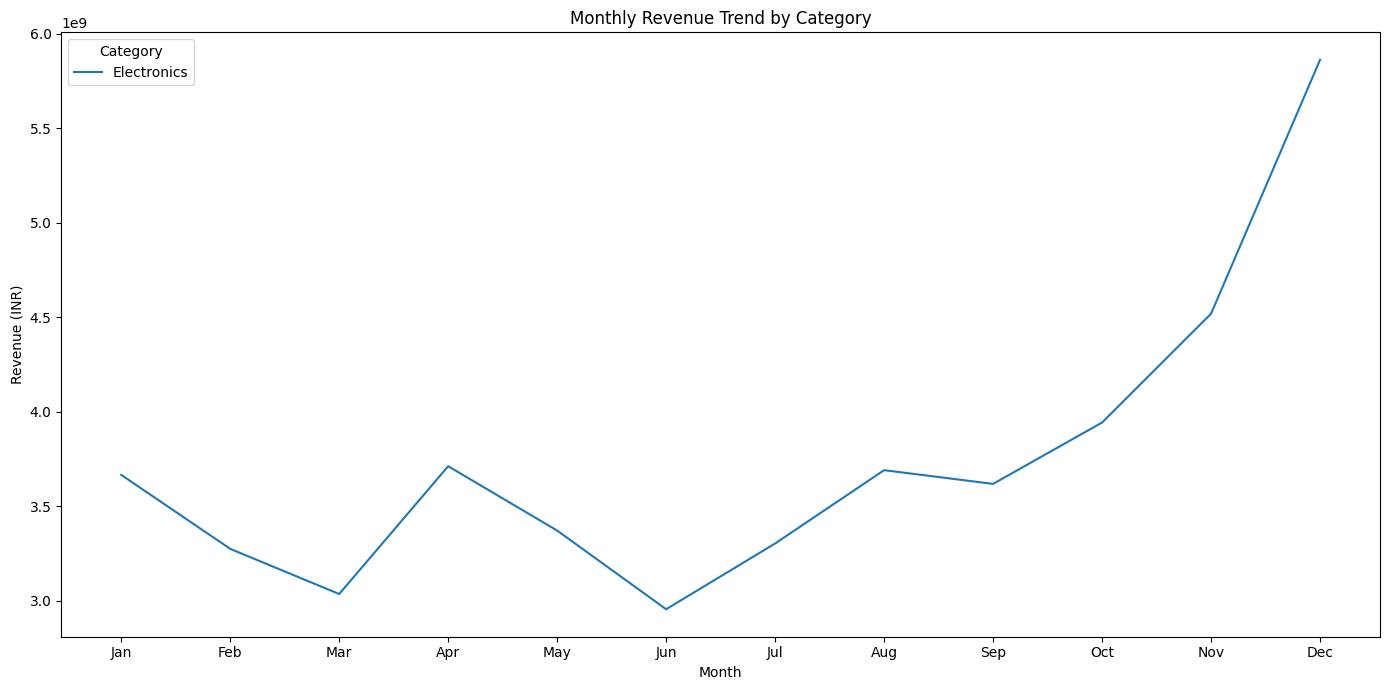


✅ Seasonal analysis complete. Saved heatmaps: monthly_sales_heatmap_overall.png, monthly_sales_heatmap_by_category.png


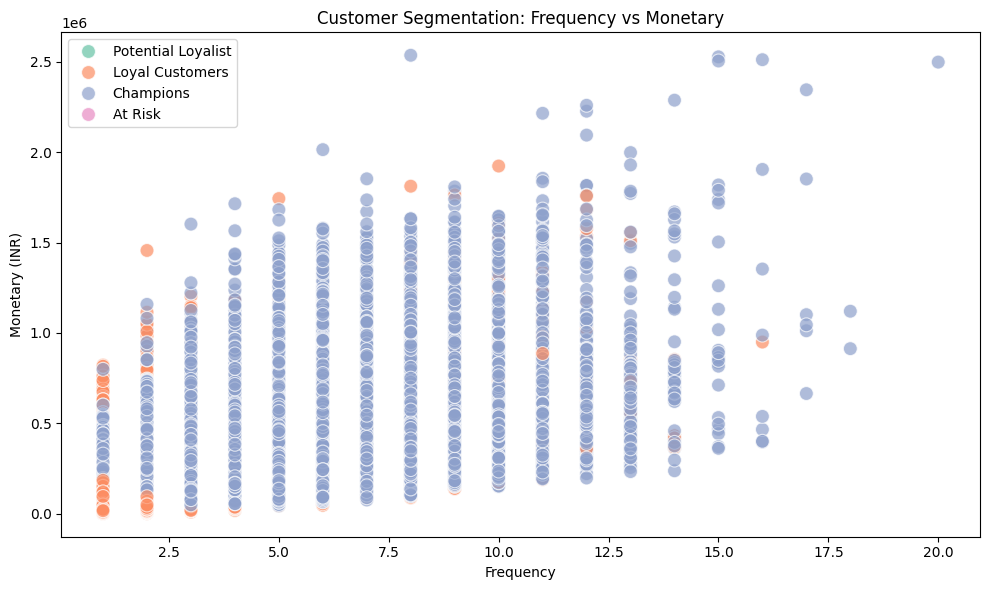

C:\Users\Alagu\AppData\Local\Temp\ipykernel_9812\2424851182.py:150: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  rfm_pivot = rfm.pivot_table(index='F_Score', columns='R_Score', values='Monetary', aggfunc='mean')


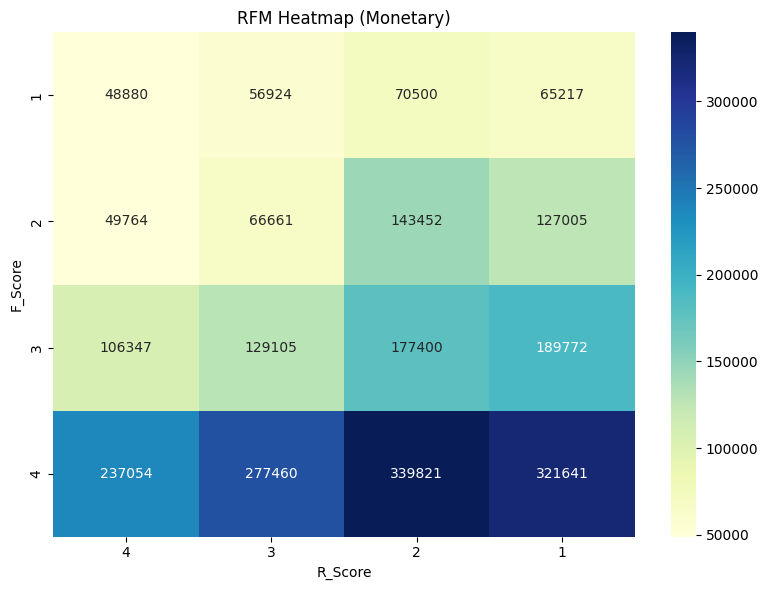


✅ RFM segmentation complete!
Columns available: ['transaction_id', 'order_date', 'customer_id', 'product_id', 'product_name', 'category', 'subcategory', 'brand', 'original_price_inr', 'discount_percent', 'discounted_price_inr', 'quantity', 'final_amount_inr', 'customer_city', 'customer_state', 'customer_tier', 'customer_spending_tier', 'payment_method', 'delivery_days', 'delivery_type', 'is_prime_member', 'festival_name', 'customer_rating', 'return_status', 'order_month', 'order_year', 'order_quarter', 'product_weight_kg', 'is_prime_eligible', 'product_rating', 'age_group_label', 'year', 'month', 'month_name']


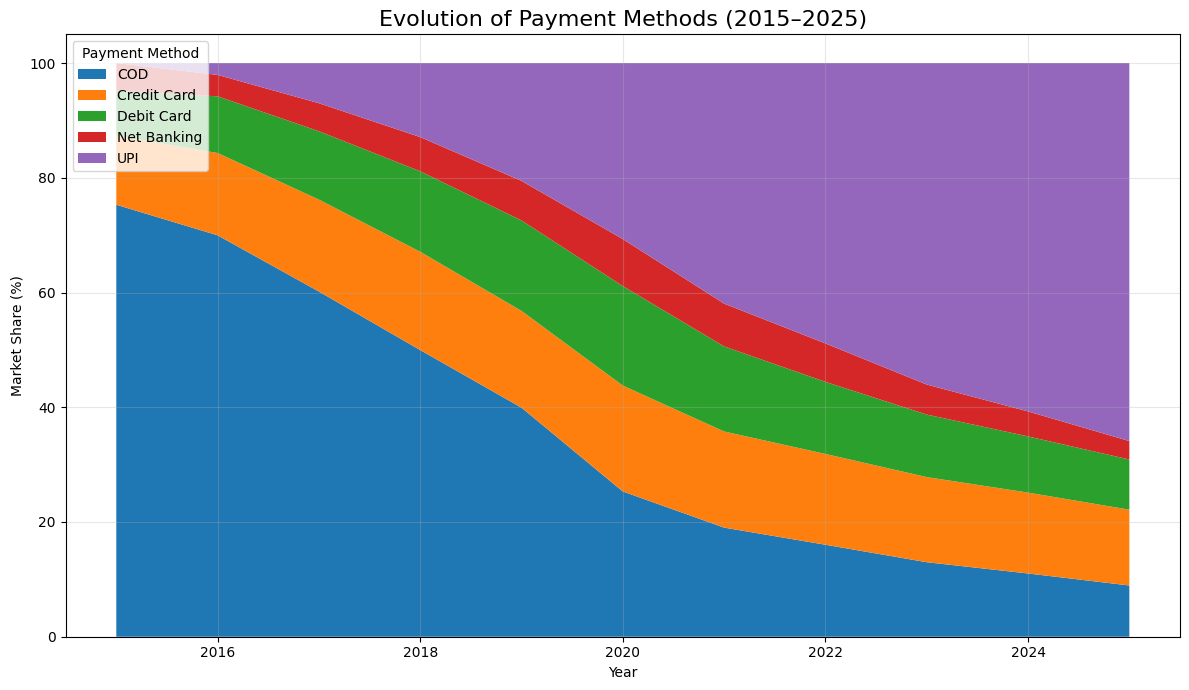


Peak UPI Share Year: 2025 → 65.9 %
Lowest COD Share Year: 2025 → 8.93 %
Columns: ['transaction_id', 'order_date', 'customer_id', 'product_id', 'product_name', 'category', 'subcategory', 'brand', 'original_price_inr', 'discount_percent', 'discounted_price_inr', 'quantity', 'final_amount_inr', 'customer_city', 'customer_state', 'customer_tier', 'customer_spending_tier', 'payment_method', 'delivery_days', 'delivery_type', 'is_prime_member', 'festival_name', 'customer_rating', 'return_status', 'order_month', 'order_year', 'order_quarter', 'product_weight_kg', 'is_prime_eligible', 'product_rating', 'age_group_label', 'year', 'month', 'month_name']


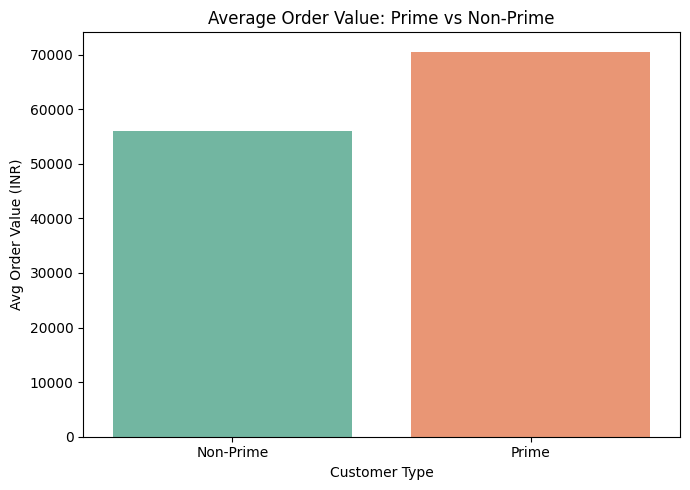


📊 Average Order Value (INR):
   Customer Type  Avg Order Value (INR)
0     Non-Prime           55914.628464
1         Prime           70535.837409


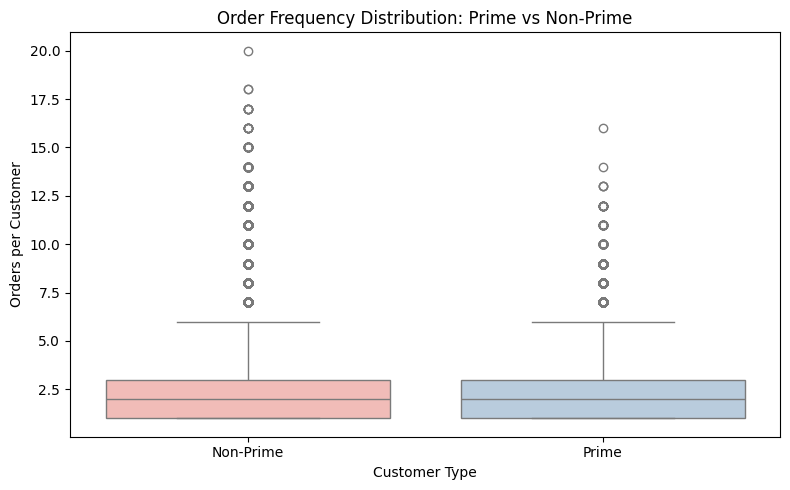


📦 Average Orders per Customer:
   is_prime_member  order_count
0       Non-Prime     2.655189
1           Prime     2.022849


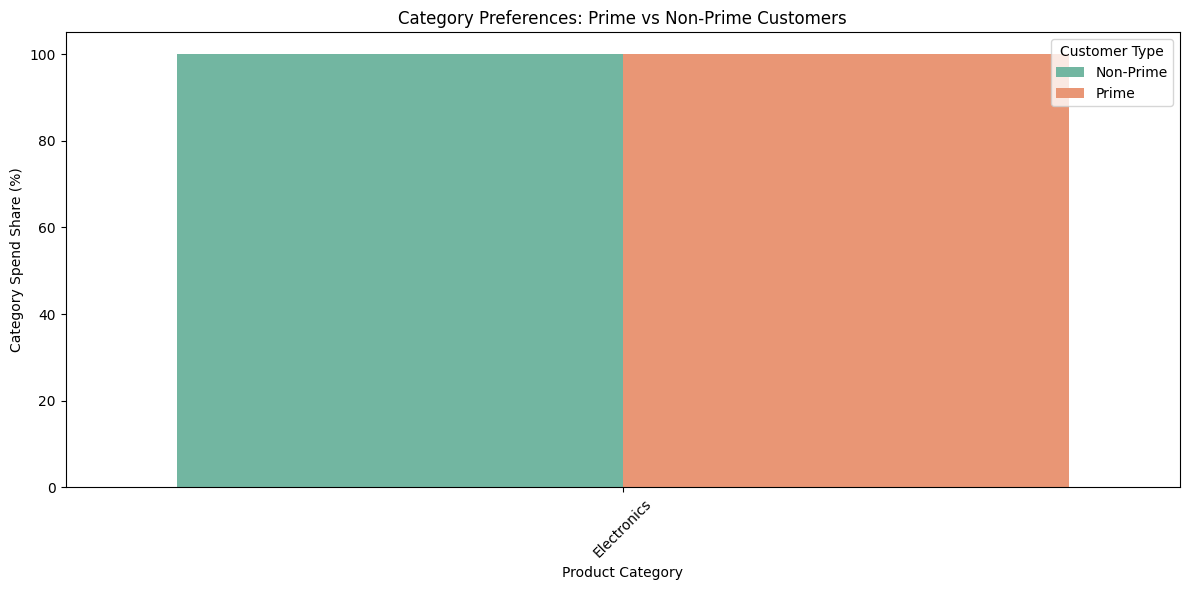


✅ Prime Membership Impact Summary:
            Avg_Order_Value_INR  Avg_Orders_per_Customer
Non-Prime         55914.628464                 2.655189
Prime             70535.837409                 2.022849


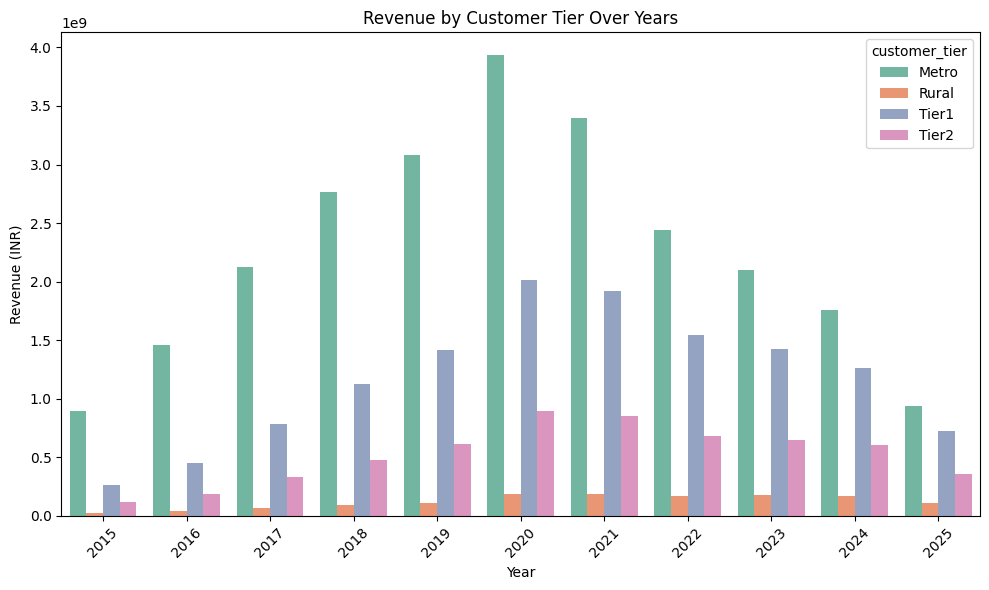

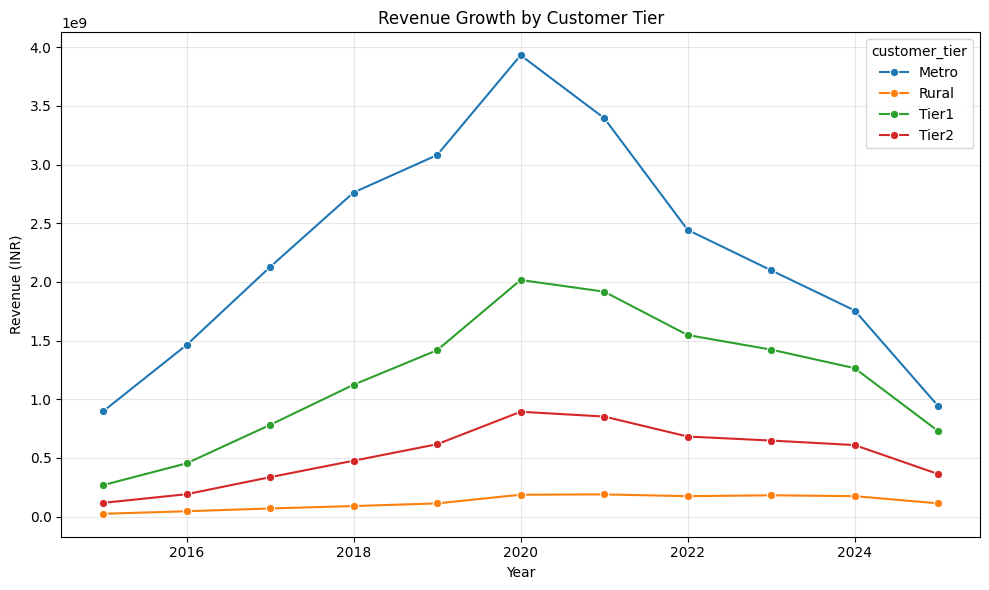

Index(['ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'geometry'], dtype='object')
✅ Choropleth map saved as india_state_revenue_map.html


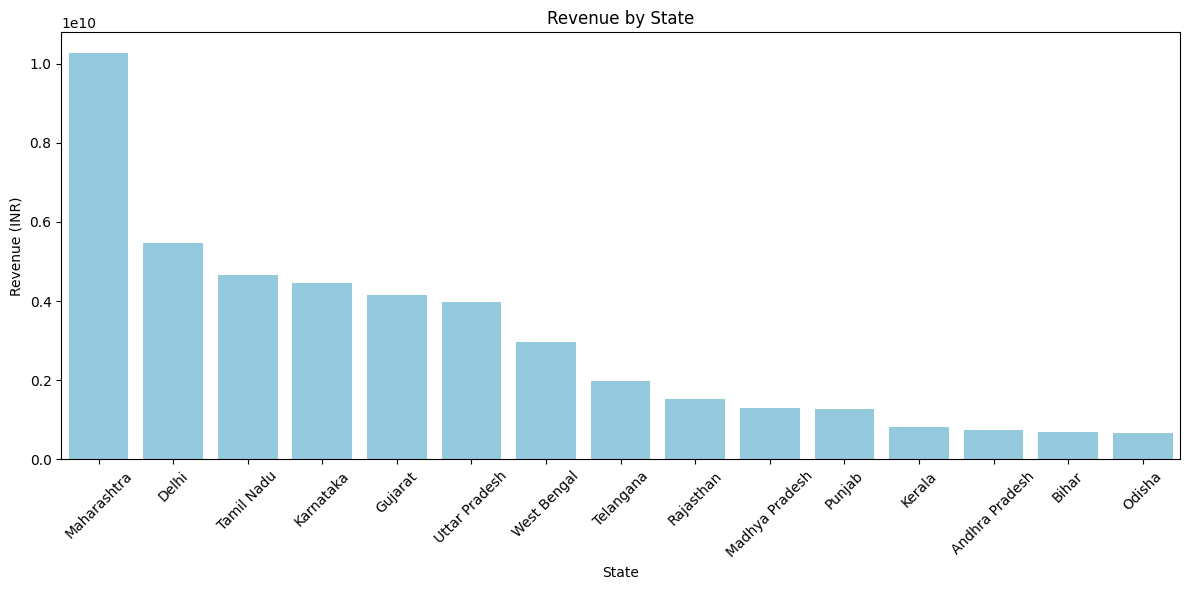

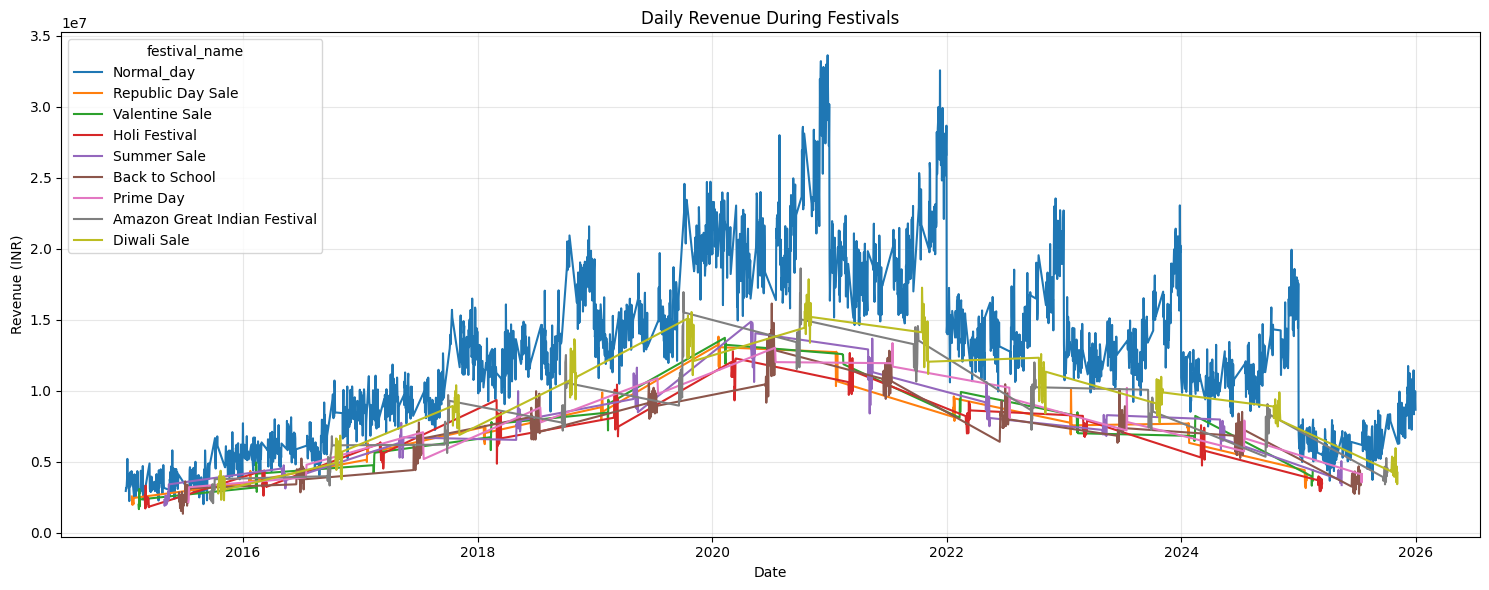

Columns: ['transaction_id', 'order_date', 'customer_id', 'product_id', 'product_name', 'category', 'subcategory', 'brand', 'original_price_inr', 'discount_percent', 'discounted_price_inr', 'quantity', 'final_amount_inr', 'customer_city', 'customer_state', 'customer_tier', 'customer_spending_tier', 'payment_method', 'delivery_days', 'delivery_type', 'is_prime_member', 'festival_name', 'customer_rating', 'return_status', 'order_month', 'order_year', 'order_quarter', 'product_weight_kg', 'is_prime_eligible', 'product_rating', 'age_group_label']
['3' '4' '1' '2' '5']
  Age Group  Total Spend  Average Spend  Number of Orders
0         1  14305767420   61301.324175            233368
1         2  15790147824   61497.693659            256760
2         3   9023878089   61334.770359            147125
3         4   4486645610   61398.659031             73074
4         5   1353314153   61233.163793             22101


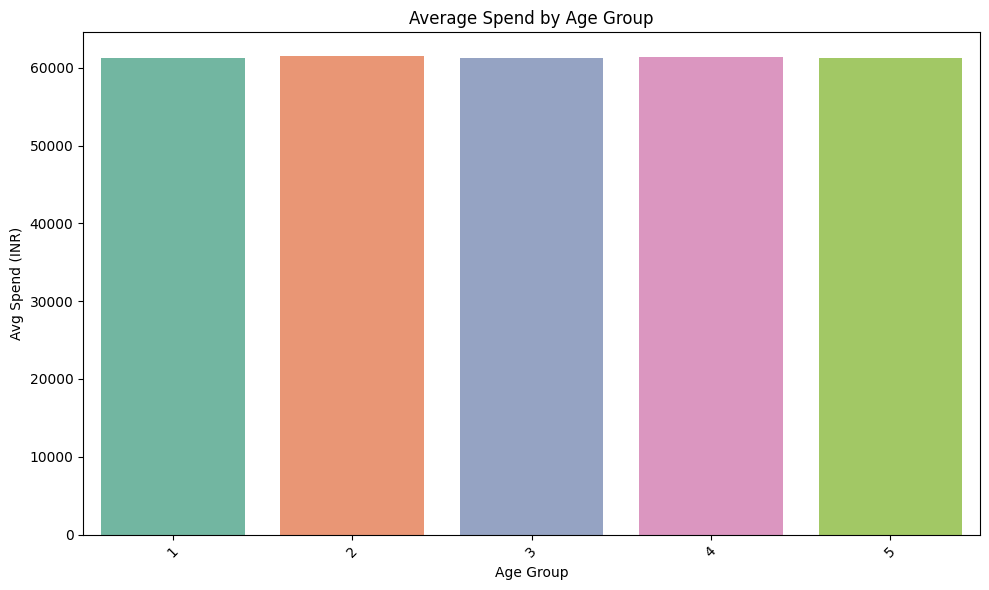

  Age Group  Average Orders per Customer
0         1                     2.380407
1         2                     2.370625
2         3                     2.385372
3         4                     2.378014
4         5                     2.362733


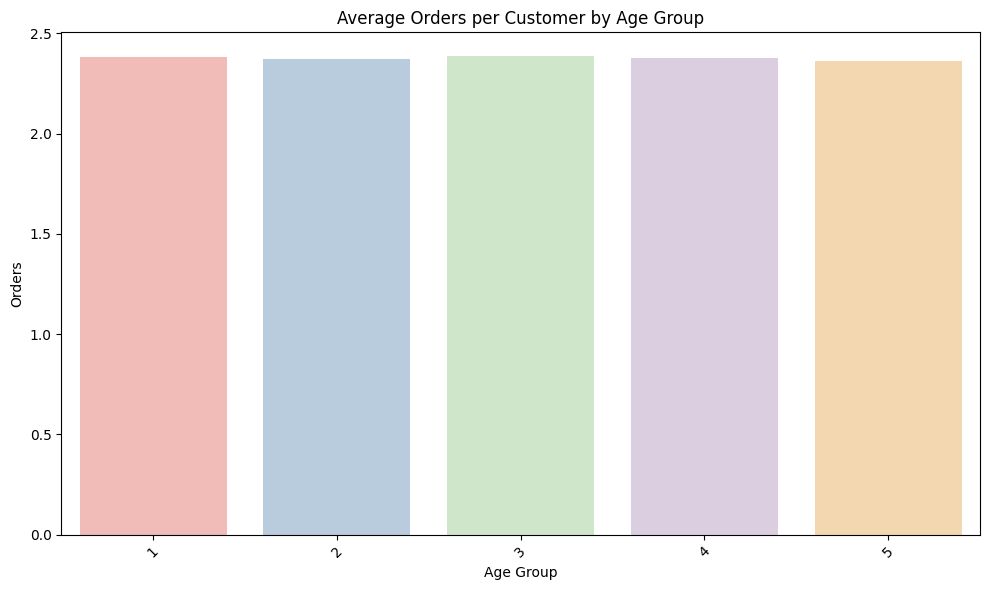

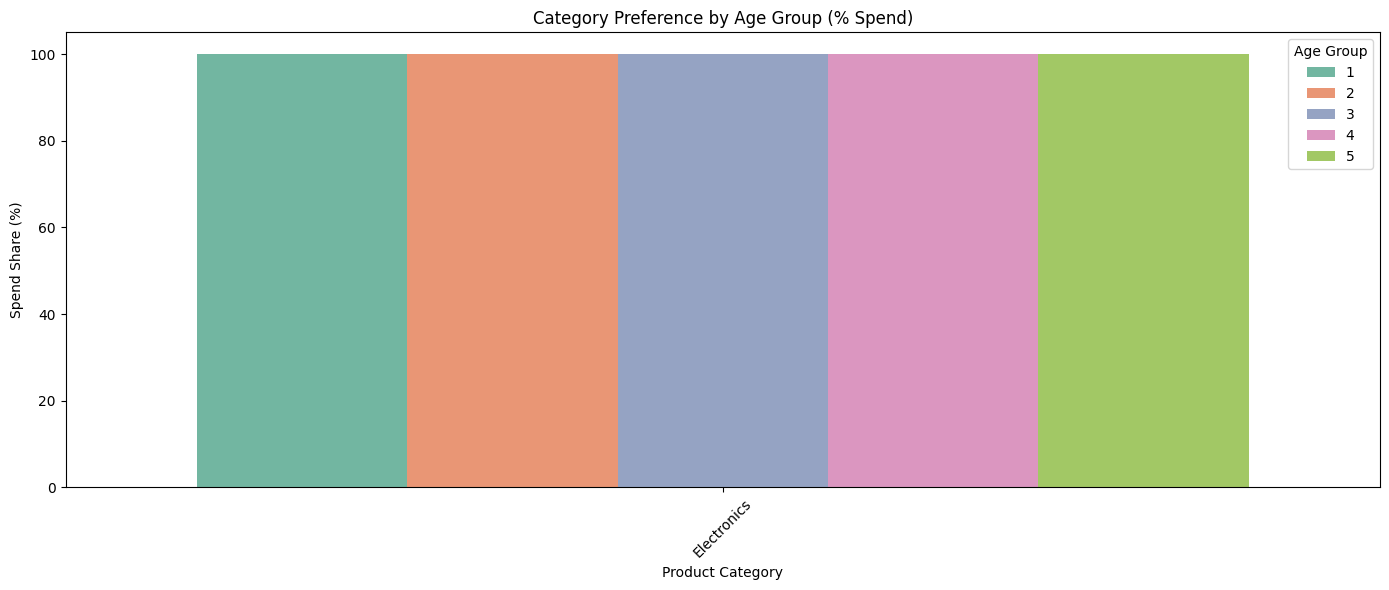

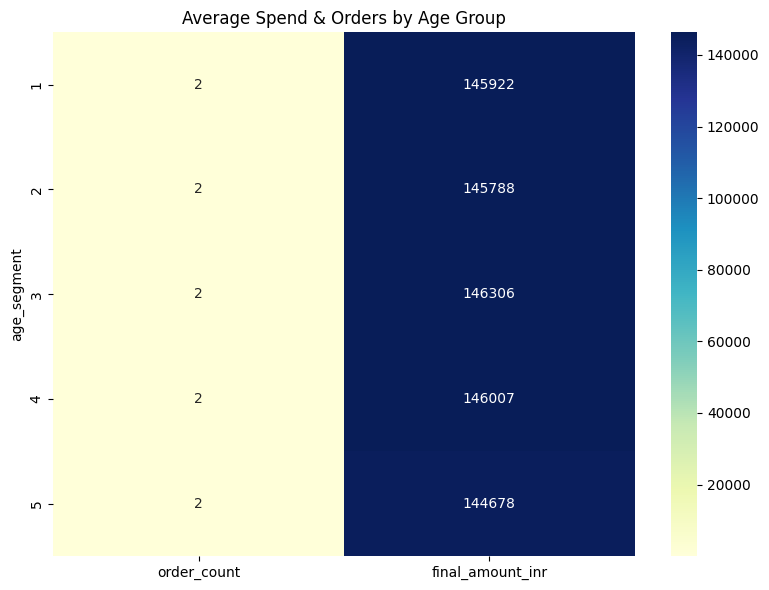

In [8]:
# amazon_sales_analysis.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import geopandas as gpd
import folium

# ---- CONFIG ----
CSV_PATH = r"C:\Users\Alagu\DATASCIENCE\Cleaned_data\amazon_india_complete_2015_2025_cleaned_03.csv"
START_YEAR = 2015
END_YEAR = 2025
OUTPUT_PLOT = "yearly_revenue_trend.png"
OUTPUT_SUMMARY = "yearly_revenue_summary.csv"
OUTPUT_HEATMAP_ALL = "monthly_sales_heatmap_overall.png"
OUTPUT_HEATMAP_CAT = "monthly_sales_heatmap_by_category.png"

# ---- Load CSV ----
df = pd.read_csv(CSV_PATH, parse_dates=['order_date'])
df['final_amount_inr'] = pd.to_numeric(df['final_amount_inr'], errors='coerce')
df = df.dropna(subset=['order_date', 'final_amount_inr'])

# ==== Yearly Revenue Trend ====
df['year'] = df['order_date'].dt.year
year_range = list(range(START_YEAR, END_YEAR+1))

yearly = df.groupby('year', as_index=False).agg(
    revenue_inr=('final_amount_inr','sum'),
    orders_count=('final_amount_inr','count')
)
yearly = yearly.set_index('year').reindex(year_range, fill_value=0).reset_index()
yearly['rev_prev'] = yearly['revenue_inr'].shift(1)
yearly['pct_growth'] = ((yearly['revenue_inr'] - yearly['rev_prev']) / yearly['rev_prev'].replace({0: np.nan})) * 100
yearly['pct_growth'] = yearly['pct_growth'].round(2)
yearly['cumulative_revenue'] = yearly['revenue_inr'].cumsum()

# CAGR
first_rev = yearly.loc[yearly['year']==START_YEAR,'revenue_inr'].values[0]
last_rev = yearly.loc[yearly['year']==END_YEAR,'revenue_inr'].values[0]
cagr_pct = round(((last_rev / first_rev)**(1/(END_YEAR-START_YEAR)) - 1)*100,2) if first_rev>0 and last_rev>0 else None

# Trend lines
x = yearly['year'].values
y = yearly['revenue_inr'].values
trend_lin = np.polyval(np.polyfit(x, y, 1), x)
trend_quad = np.polyval(np.polyfit(x, y, 2), x)

# Plot Revenue Trend
plt.figure(figsize=(12,6))
plt.plot(x, y, marker='o', label='Yearly Revenue (INR)', linewidth=2)
plt.plot(x, trend_lin, '--', label='Linear Trend')
plt.plot(x, trend_quad, ':', label='Quadratic Trend')
plt.title(f"Yearly Revenue Trend (2015–2025)" + (f" | CAGR: {cagr_pct}%" if cagr_pct else ""))
plt.xlabel("Year")
plt.ylabel("Revenue (INR)")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig(OUTPUT_PLOT, dpi=150)
plt.show()

# Save summary
yearly.to_csv(OUTPUT_SUMMARY, index=False)
print(f"✅ Yearly revenue analysis complete. Saved to {OUTPUT_PLOT} & {OUTPUT_SUMMARY}")

# ==== Seasonal Sales Heatmap ====
df['month'] = df['order_date'].dt.month
df['month_name'] = df['order_date'].dt.strftime('%b')
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df['month_name'] = pd.Categorical(df['month_name'], categories=month_order, ordered=True)

monthly_sales = df.groupby(['year','month_name'], as_index=False)['final_amount_inr'].sum()
pivot_sales = monthly_sales.pivot(index='year', columns='month_name', values='final_amount_inr')

plt.figure(figsize=(12,6))
sns.heatmap(pivot_sales, cmap='YlGnBu', fmt='.0f', annot=True, linewidths=0.5)
plt.title("Monthly Sales Heatmap (Overall)")
plt.ylabel("Year")
plt.xlabel("Month")
plt.tight_layout()
plt.savefig(OUTPUT_HEATMAP_ALL, dpi=150)
plt.show()

# Peak months
peak_months = pivot_sales.idxmax(axis=1)
peak_values = pivot_sales.max(axis=1)
peak_info = pd.DataFrame({'Peak Month': peak_months, 'Revenue (INR)': peak_values})
print("\n📊 Peak Selling Month per Year:")
print(peak_info)

# Monthly revenue trends by category
cat_monthly = df.groupby(['category','year','month_name'], as_index=False)['final_amount_inr'].sum()
plt.figure(figsize=(14,7))
sns.lineplot(data=cat_monthly, x='month_name', y='final_amount_inr', hue='category', estimator='sum', ci=None)
plt.title("Monthly Revenue Trend by Category")
plt.ylabel("Revenue (INR)")
plt.xlabel("Month")
plt.legend(title="Category")
plt.tight_layout()
plt.savefig(OUTPUT_HEATMAP_CAT, dpi=150)
plt.show()

print(f"\n✅ Seasonal analysis complete. Saved heatmaps: {OUTPUT_HEATMAP_ALL}, {OUTPUT_HEATMAP_CAT}")

# ==== RFM Segmentation ====
df_rfm = df[['customer_id','order_date','final_amount_inr']].copy()
reference_date = df_rfm['order_date'].max() + timedelta(days=1)

rfm = df_rfm.groupby('customer_id').agg(
    Recency=('order_date', lambda x: (reference_date - x.max()).days),
    Frequency=('customer_id','count'),
    Monetary=('final_amount_inr','sum')
).reset_index()

# RFM scoring
rfm['R_Score'] = pd.qcut(rfm['Recency'],4,labels=[4,3,2,1])

# Rank first to handle duplicates
rfm['F_Rank'] = rfm['Frequency'].rank(method='first')
rfm['M_Rank'] = rfm['Monetary'].rank(method='first')

rfm['F_Score'] = pd.qcut(rfm['F_Rank'],4,labels=[1,2,3,4])
rfm['M_Score'] = pd.qcut(rfm['M_Rank'],4,labels=[1,2,3,4])

rfm.drop(['F_Rank','M_Rank'], axis=1, inplace=True)
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm[['R_Score','F_Score','M_Score']].astype(int).sum(axis=1)

def segment_customer(score):
    if score >= 10: return 'Champions'
    elif score >= 7: return 'Loyal Customers'
    elif score >= 5: return 'Potential Loyalist'
    elif score >= 3: return 'At Risk'
    else: return 'Lost'

rfm['Segment'] = rfm['RFM_Score'].apply(segment_customer)

# Scatter plot: Frequency vs Monetary
plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Segment', palette='Set2', s=100, alpha=0.7)
plt.title('Customer Segmentation: Frequency vs Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary (INR)')
plt.legend()
plt.tight_layout()
plt.show()

# RFM Heatmap (Monetary)
rfm_pivot = rfm.pivot_table(index='F_Score', columns='R_Score', values='Monetary', aggfunc='mean')
plt.figure(figsize=(8,6))
sns.heatmap(rfm_pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('RFM Heatmap (Monetary)')
plt.tight_layout()
plt.show()

print("\n✅ RFM segmentation complete!")

# ---- CHECK COLUMN NAMES ----################payment-method
print("Columns available:", df.columns.tolist())

# ---- ENSURE 'payment_method' COLUMN EXISTS ----
if 'payment_method' not in df.columns:
    raise KeyError("'payment_method' column not found! Please check your CSV columns.")

# ---- CLEAN PAYMENT METHOD COLUMN ----
df['payment_method'] = df['payment_method'].astype(str).str.strip().str.title()

# Optional cleanup: merge duplicates
df['payment_method'] = df['payment_method'].replace({
    'Cash On Delivery': 'COD',
    'Cod': 'COD',
    'Creditcard': 'Credit Card',
    'Debitcard': 'Debit Card',
    'Netbanking': 'Net Banking',
    'Upi': 'UPI',
    'Wallet': 'Wallet',
    'Bnpl': 'BNPL'
})

# ---- REMOVE WALLET & BNPL METHODS ----
df = df[~df['payment_method'].isin(['Wallet', 'BNPL'])]

# ---- ADD YEAR COLUMN ----
df['order_year'] = df['order_date'].dt.year

# ---- AGGREGATE YEARLY REVENUE BY PAYMENT METHOD ----
revenue_by_year = (
    df.groupby(['order_year', 'payment_method'])['final_amount_inr']
    .sum()
    .unstack(fill_value=0)
)

# ---- CALCULATE MARKET SHARE (PERCENTAGE) ----
revenue_share = revenue_by_year.div(revenue_by_year.sum(axis=1), axis=0) * 100

# ---- PLOT STACKED AREA CHART ----
plt.figure(figsize=(12, 7))
plt.stackplot(revenue_share.index, revenue_share.T, labels=revenue_share.columns)
plt.title("Evolution of Payment Methods (2015–2025)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Market Share (%)")
plt.legend(title="Payment Method", loc="upper left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ---- OPTIONAL: PRINT INSIGHTS ----
print("\nPeak UPI Share Year:", revenue_share['UPI'].idxmax(), "→", round(revenue_share['UPI'].max(), 2), "%")
print("Lowest COD Share Year:", revenue_share['COD'].idxmin(), "→", round(revenue_share['COD'].min(), 2), "%")

#############################Prime-vs-Non-Prime-customer analysis
# ---- CLEAN BASIC COLUMNS ----
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Confirm available columns
print("Columns:", df.columns.tolist())

# Ensure required columns exist
required_cols = {'customer_id', 'is_prime_member', 'final_amount_inr', 'category', 'order_date','customer_id', 'category', 'age_group_label'}
missing = required_cols - set(df.columns)
if missing:
    raise KeyError(f"Missing columns: {missing}")

# ---- CLEAN VALUES ----
df['is_prime_member'] = df['is_prime_member'].astype(str).str.strip().str.upper()
df['is_prime_member'] = df['is_prime_member'].replace({
    '1': 'Prime',
    '0': 'Non-Prime',
    'YES': 'Prime',
    'NO': 'Non-Prime',
    'TRUE': 'Prime',
    'FALSE': 'Non-Prime'
})

df['final_amount_inr'] = pd.to_numeric(df['final_amount_inr'], errors='coerce')
df = df.dropna(subset=['final_amount_inr', 'customer_id', 'order_date'])

# ---- 1️⃣ Average Order Value (AOV) ----
aov = df.groupby('is_prime_member')['final_amount_inr'].mean().reset_index()
aov.columns = ['Customer Type', 'Avg Order Value (INR)']

plt.figure(figsize=(7,5))
sns.barplot(
    data=aov,
    x='Customer Type',
    y='Avg Order Value (INR)',
    hue='Customer Type',
    palette='Set2',
    legend=False
)

plt.title("Average Order Value: Prime vs Non-Prime")
plt.ylabel("Avg Order Value (INR)")
plt.tight_layout()
plt.show()
print("\n📊 Average Order Value (INR):\n", aov)

# ---- 2️⃣ Order Frequency ----
# Count orders per customer
orders_per_customer = df.groupby(['customer_id', 'is_prime_member']).size().reset_index(name='order_count')

plt.figure(figsize=(8,5))
sns.boxplot(
    data=orders_per_customer,
    x='is_prime_member',
    y='order_count',
    hue='is_prime_member',   # assign hue
    palette='Pastel1',
    legend=False             # hide duplicate legend
)

plt.title("Order Frequency Distribution: Prime vs Non-Prime")
plt.ylabel("Orders per Customer")
plt.xlabel("Customer Type")
plt.tight_layout()
plt.show()

avg_orders = orders_per_customer.groupby('is_prime_member')['order_count'].mean().reset_index()
print("\n📦 Average Orders per Customer:\n", avg_orders)

# ---- 3️⃣ Category Preferences ----
category_pref = (
    df.groupby(['is_prime_member', 'category'])['final_amount_inr']
    .sum()
    .reset_index()
)

# ✅ FIX: Use transform instead of apply to keep index alignment
category_pref['share_%'] = (
    category_pref.groupby('is_prime_member')['final_amount_inr']
    .transform(lambda x: (x / x.sum()) * 100)
)

plt.figure(figsize=(12,6))
sns.barplot(data=category_pref, x='category', y='share_%', hue='is_prime_member', palette='Set2')
plt.title("Category Preferences: Prime vs Non-Prime Customers")
plt.ylabel("Category Spend Share (%)")
plt.xlabel("Product Category")
plt.xticks(rotation=45)
plt.legend(title="Customer Type")
plt.tight_layout()
plt.show()

# ---- 4️⃣ Summary Table ----
summary = pd.DataFrame({
    'Avg_Order_Value_INR': aov.set_index('Customer Type')['Avg Order Value (INR)'],
    'Avg_Orders_per_Customer': avg_orders.set_index('is_prime_member')['order_count']
})
print("\n✅ Prime Membership Impact Summary:\n", summary)

##################################State-vs-sales
# Keep relevant columns
df = df[['customer_city', 'customer_state', 'customer_tier', 'final_amount_inr', 'order_date']]

# Drop missing values
df = df.dropna(subset=['customer_city', 'customer_state', 'customer_tier', 'final_amount_inr'])

# Add year column for trend analysis
df['year'] = df['order_date'].dt.year

# -------------------------------
# 2. Revenue growth by Tier
# -------------------------------
tier_yearly = df.groupby(['customer_tier', 'year'], as_index=False)['final_amount_inr'].sum()

plt.figure(figsize=(10,6))
sns.barplot(data=tier_yearly, x='year', y='final_amount_inr', hue='customer_tier', palette='Set2')
plt.title('Revenue by Customer Tier Over Years')
plt.ylabel('Revenue (INR)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.lineplot(data=tier_yearly, x='year', y='final_amount_inr', hue='customer_tier', marker='o')
plt.title('Revenue Growth by Customer Tier')
plt.ylabel('Revenue (INR)')
plt.xlabel('Year')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# -------------------------------
# 3. Revenue by State
# -------------------------------
# Standardize state names if needed
state_mapping = {
    'Andaman & Nicobar': 'Andaman and Nicobar Islands',
    'Orissa': 'Odisha'
}
df['customer_state'] = df['customer_state'].replace(state_mapping)

# Aggregate revenue by state
state_sales = df.groupby('customer_state')['final_amount_inr'].sum().reset_index()

# -------------------------------
# 4. Load India GeoJSON/ shapefile
# -------------------------------
# Example GeoJSON for Indian states (replace with local path if needed)
india_states_url = "https://raw.githubusercontent.com/geohacker/india/master/state/india_telengana.geojson"

india_gdf = gpd.read_file(india_states_url)

# Check GeoDataFrame columns
print(india_gdf.columns)

# Merge revenue with GeoDataFrame
# Replace 'NAME_1' with your GeoJSON state name column
# Merge using the actual state name column
india_gdf = india_gdf.merge(
    state_sales,
    left_on='NAME_1',   # replace with actual column from india_gdf
    right_on='customer_state',
    how='left'
)

# Fill missing revenues
india_gdf['final_amount_inr'] = india_gdf['final_amount_inr'].fillna(0)



# -------------------------------
# 5. Plot Choropleth Map with Folium
# -------------------------------
m = folium.Map(location=[22.0, 79.0], zoom_start=5)

folium.Choropleth(
    geo_data=india_gdf,
    data=india_gdf,
    columns=['NAME_1', 'final_amount_inr'],   # use correct column
    key_on='feature.properties.NAME_1',       # must match geo_data property
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Revenue (INR)'
).add_to(m)

m.save("india_state_revenue_map.html")
m

print("✅ Choropleth map saved as india_state_revenue_map.html")

# -------------------------------
# 6. Optional: Bar chart for top states
# -------------------------------
top_states = state_sales.sort_values('final_amount_inr', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(data=top_states, x='customer_state', y='final_amount_inr', color='skyblue')

plt.xticks(rotation=45)
plt.title("Revenue by State")
plt.ylabel("Revenue (INR)")
plt.xlabel("State")
plt.tight_layout()
plt.show()

##########Festival-sales-comparison
# Reload CSV for festival analysis
df_fest = pd.read_csv(CSV_PATH, parse_dates=['order_date'])

# Keep only relevant columns
df_fest = df_fest[['order_date', 'final_amount_inr', 'festival_name']]

# Drop missing values
df_fest['final_amount_inr'] = pd.to_numeric(df_fest['final_amount_inr'], errors='coerce')
df_fest = df_fest.dropna(subset=['order_date', 'final_amount_inr', 'festival_name'])


# Extract Year & Month for trend analysis
df_fest['year'] = df_fest['order_date'].dt.year
df_fest['month'] = df_fest['order_date'].dt.month

# Only during festival
df_fest = df_fest[df_fest['festival_name'].notna()]

# Aggregate daily revenue
daily_revenue = df_fest.groupby(['order_date', 'festival_name'], as_index=False)['final_amount_inr'].sum()

# Plot
plt.figure(figsize=(15,6))
sns.lineplot(data=daily_revenue, x='order_date', y='final_amount_inr', hue='festival_name')
plt.title("Daily Revenue During Festivals")
plt.ylabel("Revenue (INR)")
plt.xlabel("Date")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#####################################Customer_age_group_product_vs_sales
## List all column names
# ---- CLEAN BASIC COLUMNS ----
df = pd.read_csv(CSV_PATH, parse_dates=['order_date'])
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Confirm available columns
print("Columns:", df.columns.tolist())

# Ensure necessary columns exist
#required_cols = ['customer_id', 'age_group_label', 'category', 'final_amount_inr', 'order_date']
missing = set(required_cols) - set(df.columns)
if missing:
    raise KeyError(f"Missing columns: {missing}")

# Clean numeric column
df['final_amount_inr'] = pd.to_numeric(df['final_amount_inr'], errors='coerce')

# Drop rows with missing critical data
df = df.dropna(subset=['customer_id', 'age_group_label', 'final_amount_inr', 'category', 'order_date'])

# Optional: Standardize age group labels
df['age_group_label'] = df['age_group_label'].astype(str).str.strip()

# Check unique age groups
print(df['age_group_label'].unique())

# Use as-is
df['age_segment'] = df['age_group_label']

# Total and average spend by age group
spend_age = df.groupby('age_segment')['final_amount_inr'].agg(['sum','mean','count']).reset_index()
spend_age.columns = ['Age Group', 'Total Spend', 'Average Spend', 'Number of Orders']

print(spend_age)

# Plot Average Spend per Age Group
plt.figure(figsize=(10,6))
sns.barplot(data=spend_age, x='Age Group', y='Average Spend', hue='Age Group', palette='Set2', dodge=False, legend=False)

plt.title('Average Spend by Age Group')
plt.ylabel('Avg Spend (INR)')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Orders per customer in each age group
freq_age = df.groupby(['customer_id','age_segment']).size().reset_index(name='order_count')

# Average orders per age group
avg_orders = freq_age.groupby('age_segment')['order_count'].mean().reset_index()
avg_orders.columns = ['Age Group', 'Average Orders per Customer']

print(avg_orders)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    data=avg_orders, 
    x='Age Group', 
    y='Average Orders per Customer', 
    hue='Age Group',   # assign hue
    palette='Pastel1',
    dodge=False,
    legend=False       # hide duplicate legend
)
plt.title('Average Orders per Customer by Age Group')
plt.ylabel('Orders')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Total spend per category for each age group
cat_pref = df.groupby(['age_segment','category'])['final_amount_inr'].sum().reset_index()

# Compute share % for each age group
cat_pref['share_%'] = cat_pref.groupby('age_segment')['final_amount_inr'].transform(lambda x: x/x.sum()*100)

plt.figure(figsize=(14,6))
sns.barplot(data=cat_pref, x='category', y='share_%', hue='age_segment', palette='Set2')
plt.title('Category Preference by Age Group (% Spend)')
plt.ylabel('Spend Share (%)')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

# Pivot table: average spend vs average orders per age group
heatmap_data = freq_age.merge(df.groupby(['customer_id','age_segment'])['final_amount_inr'].sum().reset_index(), on=['customer_id','age_segment'])
heatmap_data = heatmap_data.groupby('age_segment').agg({'order_count':'mean','final_amount_inr':'mean'}).reset_index()

plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data.set_index('age_segment'), annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Average Spend & Orders by Age Group')
plt.tight_layout()
plt.show()





['transaction_id', 'order_date', 'customer_id', 'product_id', 'product_name', 'category', 'subcategory', 'brand', 'original_price_inr', 'discount_percent', 'discounted_price_inr', 'quantity', 'final_amount_inr', 'customer_city', 'customer_state', 'customer_tier', 'customer_spending_tier', 'payment_method', 'delivery_days', 'delivery_type', 'is_prime_member', 'festival_name', 'customer_rating', 'return_status', 'order_month', 'order_year', 'order_quarter', 'product_weight_kg', 'is_prime_eligible', 'product_rating', 'age_group_label']


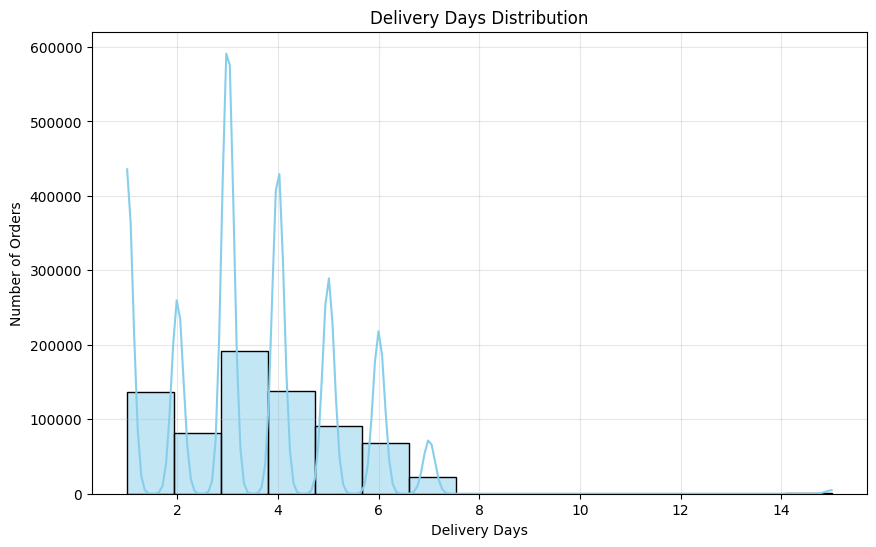

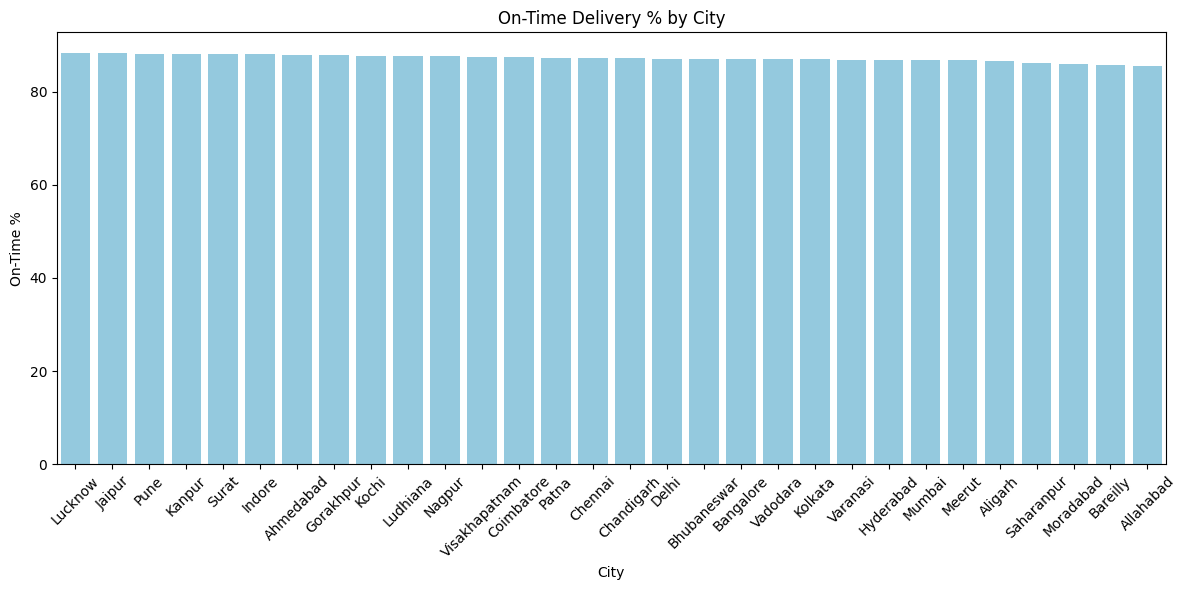

C:\Users\Alagu\AppData\Local\Temp\ipykernel_9812\2886616132.py:54: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Alagu\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


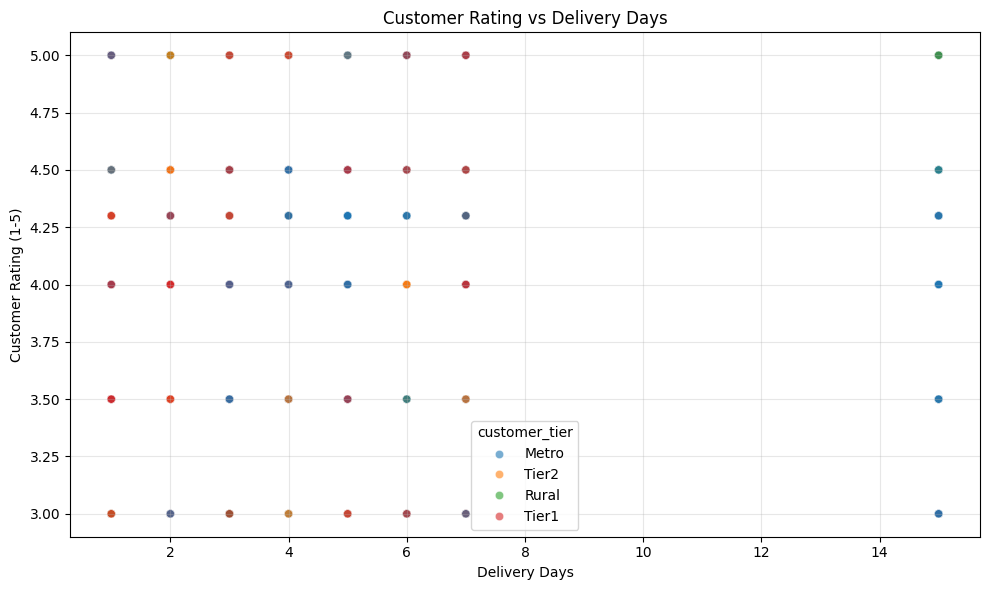

Correlation between Delivery Days and Customer Rating: -0.04


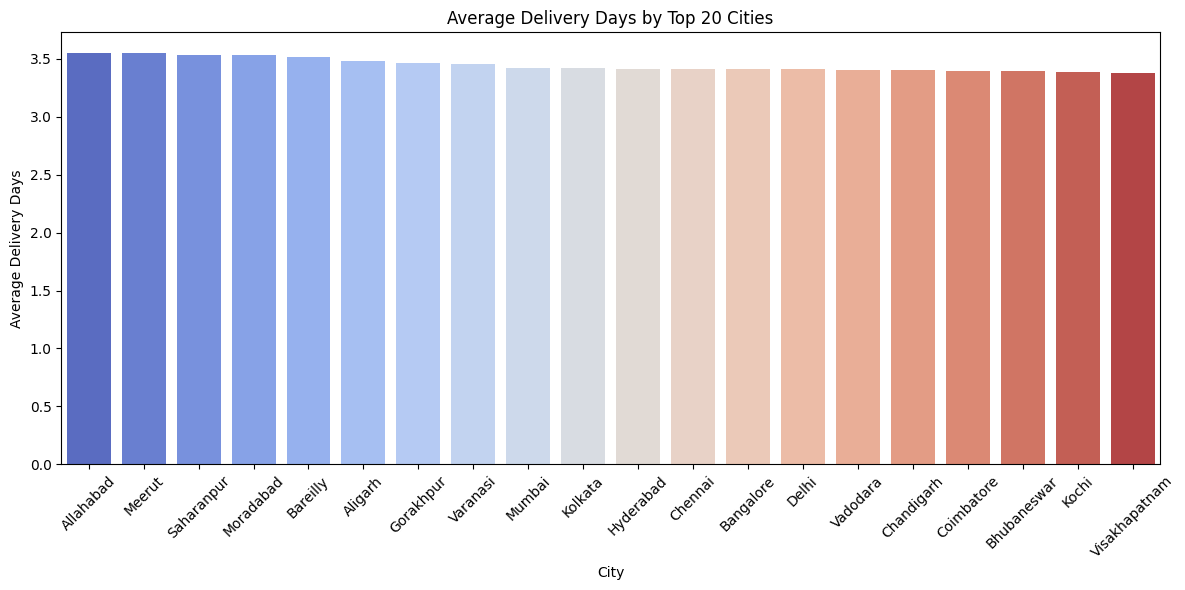

C:\Users\Alagu\AppData\Local\Temp\ipykernel_9812\2886616132.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_delivery_tier, x='customer_tier', y='delivery_days', palette='Set2')


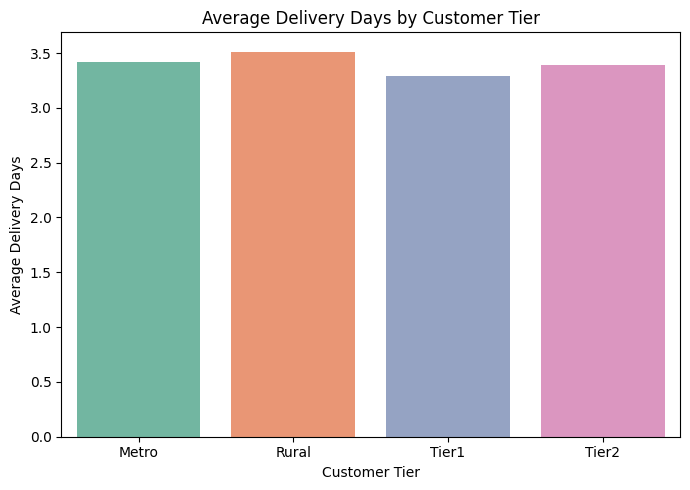

  customer_tier customer_city  avg_delivery_days  on_time_pct  \
0         Metro     Bangalore           3.416347    87.079781   
1         Metro       Chennai           3.416847    87.208966   
2         Metro         Delhi           3.415081    87.086183   
3         Metro     Hyderabad           3.417106    86.853463   
4         Metro       Kolkata           3.420994    86.933419   
5         Metro        Mumbai           3.421732    86.844523   
6         Rural       Aligarh           3.483365    86.475410   
7         Rural     Allahabad           3.552342    85.436396   
8         Rural      Bareilly           3.519419    85.656421   
9         Rural     Gorakhpur           3.466791    87.832094   

   avg_customer_rating  
0             4.324322  
1             4.326544  
2             4.326985  
3             4.323553  
4             4.330439  
5             4.324202  
6             4.254219  
7             4.248451  
8             4.250417  
9             4.254570  


In [9]:
df = pd.read_csv(CSV_PATH, parse_dates=['order_date'])

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Check columns
print(df.columns.tolist())

# Ensure required columns exist
required_cols = ['customer_id','customer_city','customer_tier','delivery_days','customer_rating']
missing = set(required_cols) - set(df.columns)
if missing:
    raise KeyError(f"Missing columns: {missing}")

# Convert numeric
df['delivery_days'] = pd.to_numeric(df['delivery_days'], errors='coerce')
df['customer_rating'] = pd.to_numeric(df['customer_rating'], errors='coerce')

# Drop rows with missing critical data
df = df.dropna(subset=required_cols)

plt.figure(figsize=(10,6))
sns.histplot(df['delivery_days'], bins=15, kde=True, color='skyblue')
plt.title('Delivery Days Distribution')
plt.xlabel('Delivery Days')
plt.ylabel('Number of Orders')
plt.grid(alpha=0.3)
plt.show()

df['on_time'] = df['delivery_days'] <= 5  # True if delivered on time
on_time_city = df.groupby('customer_city')['on_time'].mean().reset_index()
on_time_city['on_time_%'] = on_time_city['on_time']*100

plt.figure(figsize=(12,6))
sns.barplot(
    data=on_time_city.sort_values('on_time_%', ascending=False),
    x='customer_city',
    y='on_time_%',
    color='skyblue'  # replace palette with a single color
)
plt.xticks(rotation=45)
plt.title('On-Time Delivery % by City')
plt.ylabel('On-Time %')
plt.xlabel('City')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='delivery_days', y='customer_rating', hue='customer_tier', alpha=0.6)
plt.title('Customer Rating vs Delivery Days')
plt.xlabel('Delivery Days')
plt.ylabel('Customer Rating (1-5)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Correlation
corr = df['delivery_days'].corr(df['customer_rating'])
print(f"Correlation between Delivery Days and Customer Rating: {corr:.2f}")

avg_delivery_city = df.groupby('customer_city')['delivery_days'].mean().reset_index()
avg_delivery_tier = df.groupby('customer_tier')['delivery_days'].mean().reset_index()

# City heatmap (optional)
top_cities = avg_delivery_city.sort_values('delivery_days', ascending=False).head(20)
plt.figure(figsize=(12,6))
sns.barplot(
    data=top_cities,
    x='customer_city',
    y='delivery_days',
    hue='customer_city',   # assign hue
    palette='coolwarm',
    dodge=False,
    legend=False           # hide duplicate legend
)
plt.title('Average Delivery Days by Top 20 Cities')
plt.ylabel('Average Delivery Days')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Tier comparison
plt.figure(figsize=(7,5))
sns.barplot(data=avg_delivery_tier, x='customer_tier', y='delivery_days', palette='Set2')
plt.title('Average Delivery Days by Customer Tier')
plt.ylabel('Average Delivery Days')
plt.xlabel('Customer Tier')
plt.tight_layout()
plt.show()

summary_delivery = df.groupby(['customer_tier','customer_city']).agg(
    avg_delivery_days=('delivery_days','mean'),
    on_time_pct=('on_time','mean'),
    avg_customer_rating=('customer_rating','mean')
).reset_index()

summary_delivery['on_time_pct'] = summary_delivery['on_time_pct']*100
print(summary_delivery.head(10))

['transaction_id', 'order_date', 'customer_id', 'product_id', 'product_name', 'category', 'subcategory', 'brand', 'original_price_inr', 'discount_percent', 'discounted_price_inr', 'quantity', 'final_amount_inr', 'customer_city', 'customer_state', 'customer_tier', 'customer_spending_tier', 'payment_method', 'delivery_days', 'delivery_type', 'is_prime_member', 'festival_name', 'customer_rating', 'return_status', 'order_month', 'order_year', 'order_quarter', 'product_weight_kg', 'is_prime_eligible', 'product_rating', 'age_group_label']


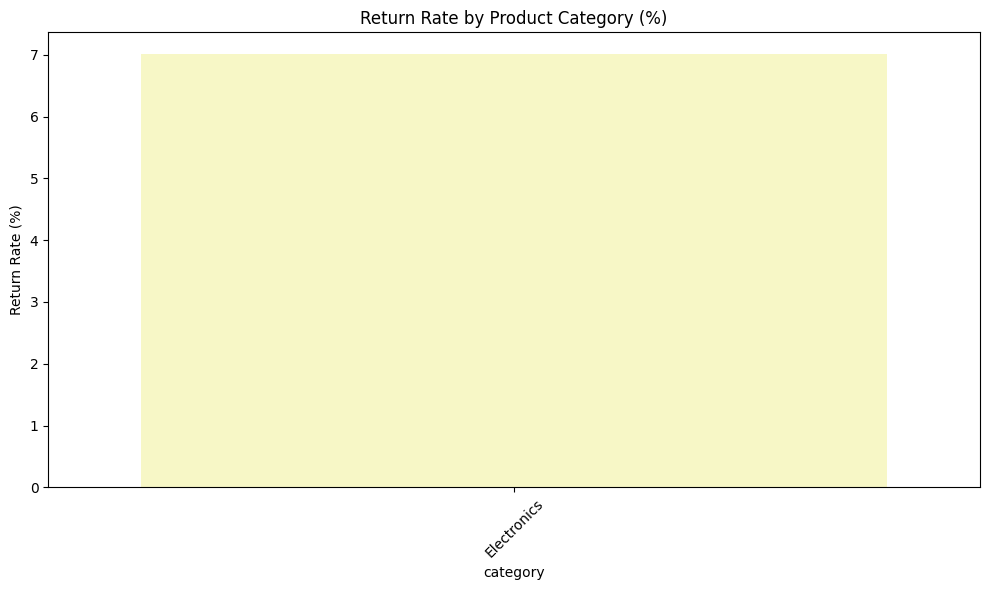

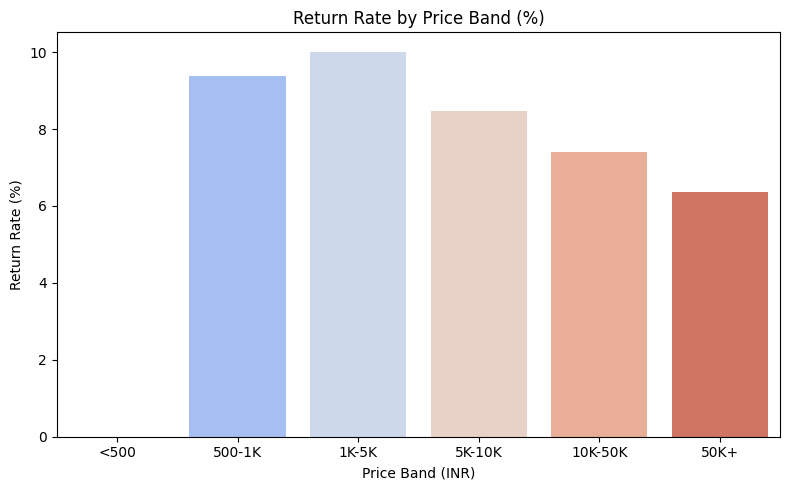

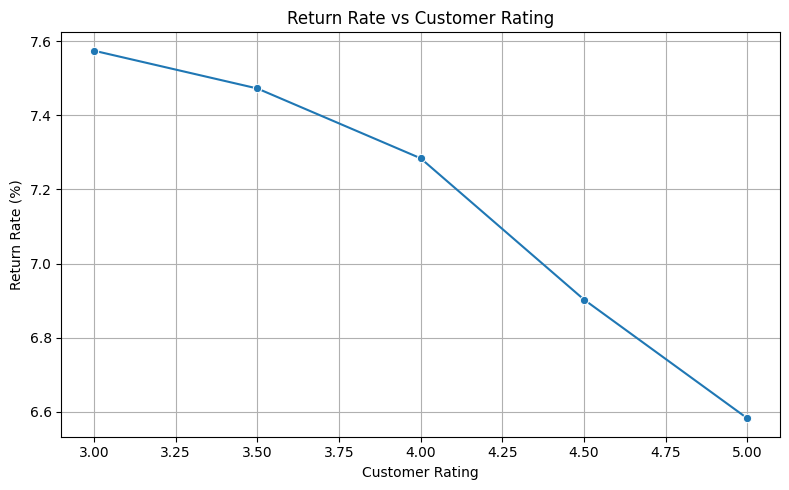

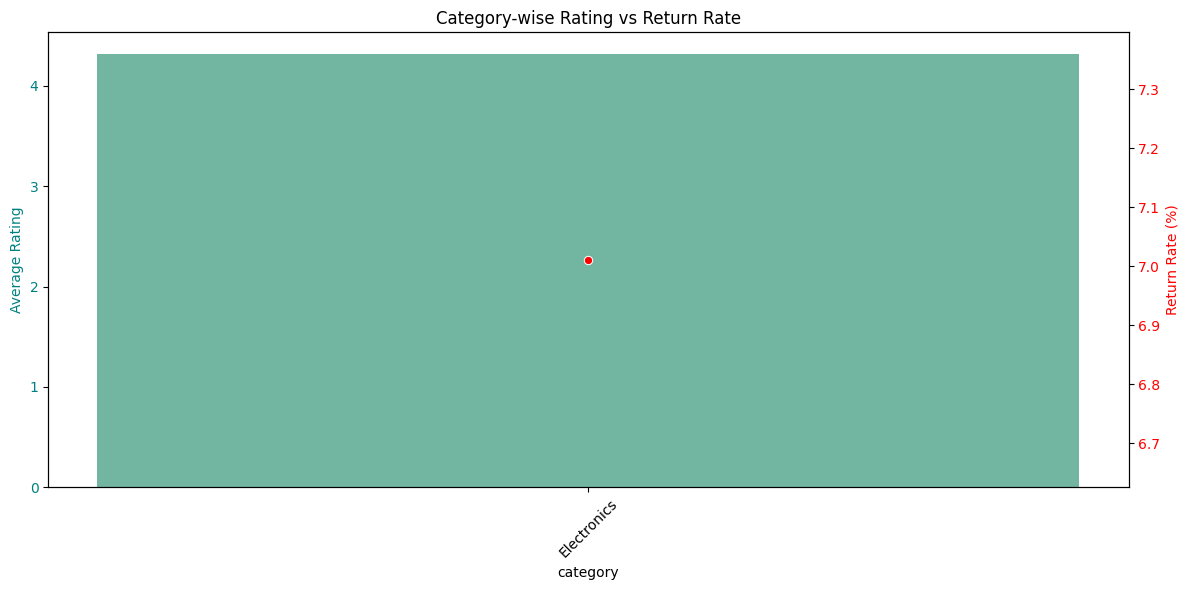


📊 Overall Return Analysis:
Total Orders: 473669
Returned Orders: 33210
Overall Return Rate: 7.01%
Correlation between Rating and Returns: -0.013


In [26]:
df = pd.read_csv(CSV_PATH, parse_dates=['order_date'])

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Check columns
print(df.columns.tolist())

# Ensure correct column names exist
required_cols = [
    'return_status', 'customer_rating', 'category',
    'brand', 'final_amount_inr', 'product_name'
]
missing = set(required_cols) - set(df.columns)
if missing:
    raise KeyError(f"Missing columns: {missing}")

# Clean up
df['return_status'] = df['return_status'].astype(str).str.strip().str.lower()
df['customer_rating'] = pd.to_numeric(df['customer_rating'], errors='coerce')
df['final_amount_inr'] = pd.to_numeric(df['final_amount_inr'], errors='coerce')

# ✅ Remove placeholder/null-like rating "4.3"
df = df[df['customer_rating'] != 4.3]

# Define return indicator (1=Returned, 0=Not Returned)
df['is_returned'] = df['return_status'].apply(lambda x: 1 if 'return' in x else 0)

# =====================================
# 1️⃣ Return Rate by Category
# =====================================
return_cat = df.groupby('category')['is_returned'].mean().reset_index()
return_cat['return_rate_%'] = return_cat['is_returned'] * 100

plt.figure(figsize=(10,6))
sns.barplot(
    data=return_cat.sort_values('return_rate_%', ascending=False),
    x='category',
    y='return_rate_%',
    hue='category',
    palette='Spectral',
    dodge=False,
    legend=False
)
plt.title('Return Rate by Product Category (%)')
plt.xticks(rotation=45)
plt.ylabel('Return Rate (%)')
plt.tight_layout()
plt.show()

# =====================================
# 2️⃣ Return Rate by Price Band
# =====================================
bins = [0, 500, 1000, 5000, 10000, 50000, df['final_amount_inr'].max()]
labels = ['<500', '500-1K', '1K-5K', '5K-10K', '10K-50K', '50K+']
df['price_band'] = pd.cut(df['final_amount_inr'], bins=bins, labels=labels, include_lowest=True)

return_price = df.groupby('price_band', observed=True)['is_returned'].mean().reset_index()
return_price['return_rate_%'] = return_price['is_returned'] * 100

plt.figure(figsize=(8,5))
sns.barplot(
    data=return_price,
    x='price_band',
    y='return_rate_%',
    hue='price_band',
    palette='coolwarm',
    dodge=False,
    legend=False
)
plt.title('Return Rate by Price Band (%)')
plt.ylabel('Return Rate (%)')
plt.xlabel('Price Band (INR)')
plt.tight_layout()
plt.show()

# =====================================
# 3️⃣ Correlation: Rating vs Returns
# =====================================
rating_return = df.groupby('customer_rating')['is_returned'].mean().reset_index()
rating_return['return_rate_%'] = rating_return['is_returned'] * 100

plt.figure(figsize=(8,5))
sns.lineplot(data=rating_return, x='customer_rating', y='return_rate_%', marker='o')
plt.title('Return Rate vs Customer Rating')
plt.xlabel('Customer Rating')
plt.ylabel('Return Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# =====================================
# 4️⃣ Category vs Average Rating (with Return Overlay)
# =====================================
cat_rating = df.groupby('category').agg({
    'customer_rating':'mean',
    'is_returned':'mean'
}).reset_index()
cat_rating['return_rate_%'] = cat_rating['is_returned'] * 100

fig, ax1 = plt.subplots(figsize=(12,6))
sns.barplot(
    data=cat_rating.sort_values('customer_rating', ascending=False),
    x='category', y='customer_rating', hue='category', palette='Set2', dodge=False, legend=False
)
ax1.set_ylabel('Average Rating', color='teal')
ax1.set_title('Category-wise Rating vs Return Rate')
ax1.tick_params(axis='y', labelcolor='teal')
plt.setp(ax1.get_xticklabels(), rotation=45)

ax2 = ax1.twinx()
sns.lineplot(data=cat_rating, x='category', y='return_rate_%', color='red', marker='o', ax=ax2)
ax2.set_ylabel('Return Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.tight_layout()
plt.show()

# =====================================
# 5️⃣ Overall Stats Summary
# =====================================
total_returns = df['is_returned'].sum()
total_orders = len(df)
return_rate = (total_returns / total_orders) * 100

print(f"\n📊 Overall Return Analysis:")
print(f"Total Orders: {total_orders}")
print(f"Returned Orders: {total_returns}")
print(f"Overall Return Rate: {return_rate:.2f}%")

# Correlation between rating and return
corr = df[['customer_rating','is_returned']].corr().iloc[0,1]
print(f"Correlation between Rating and Returns: {corr:.3f}")

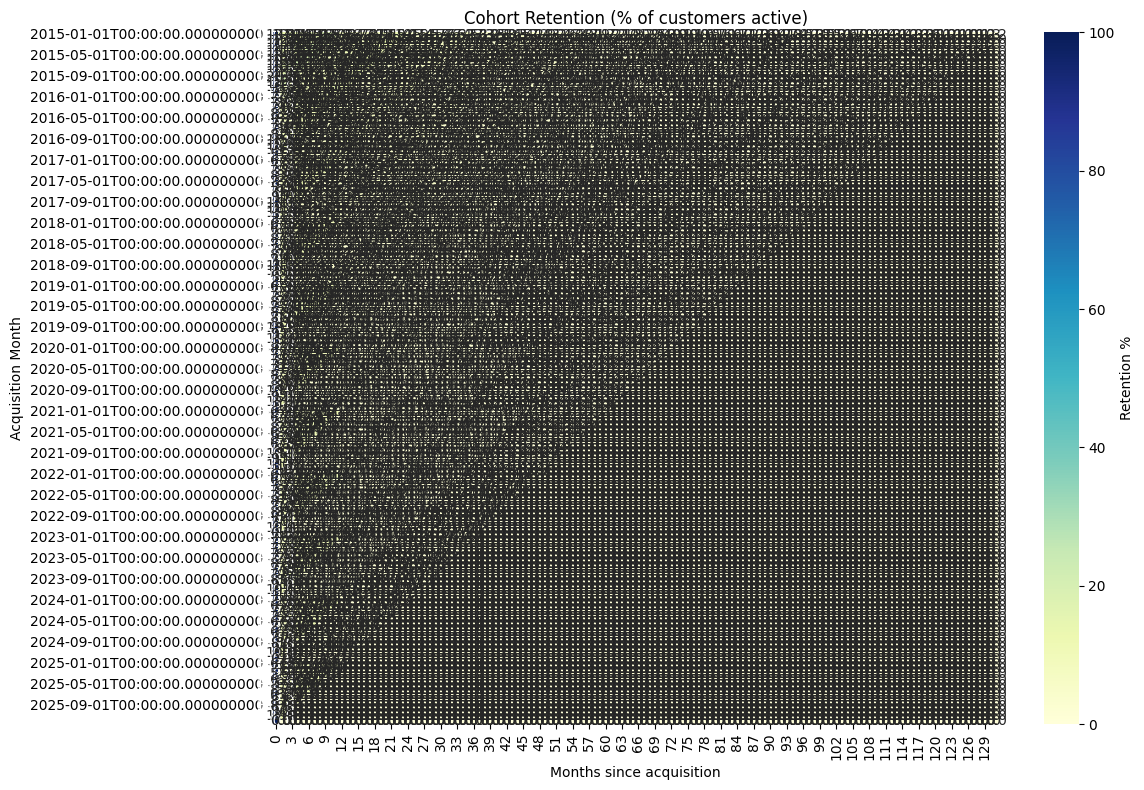

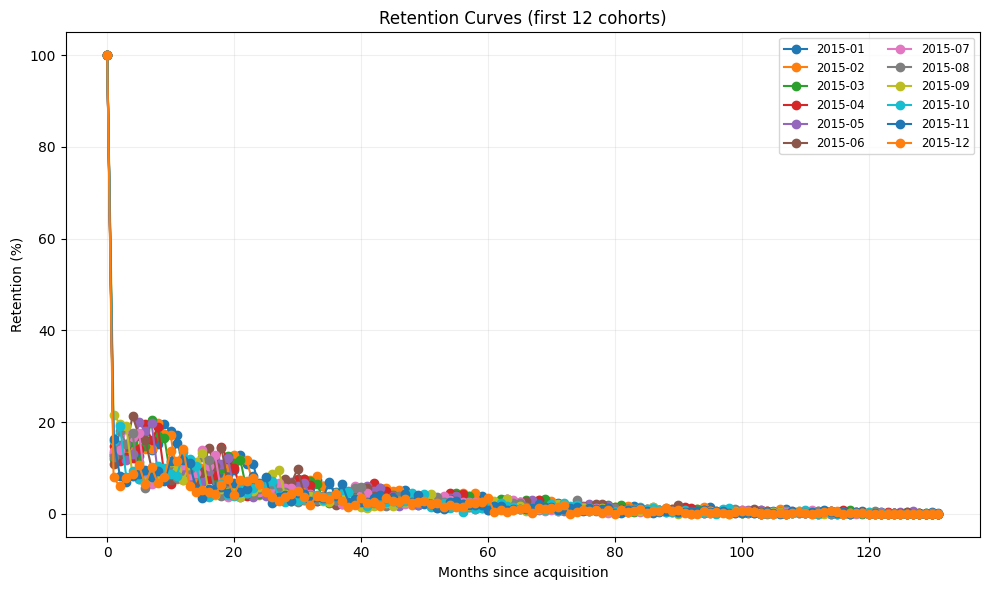

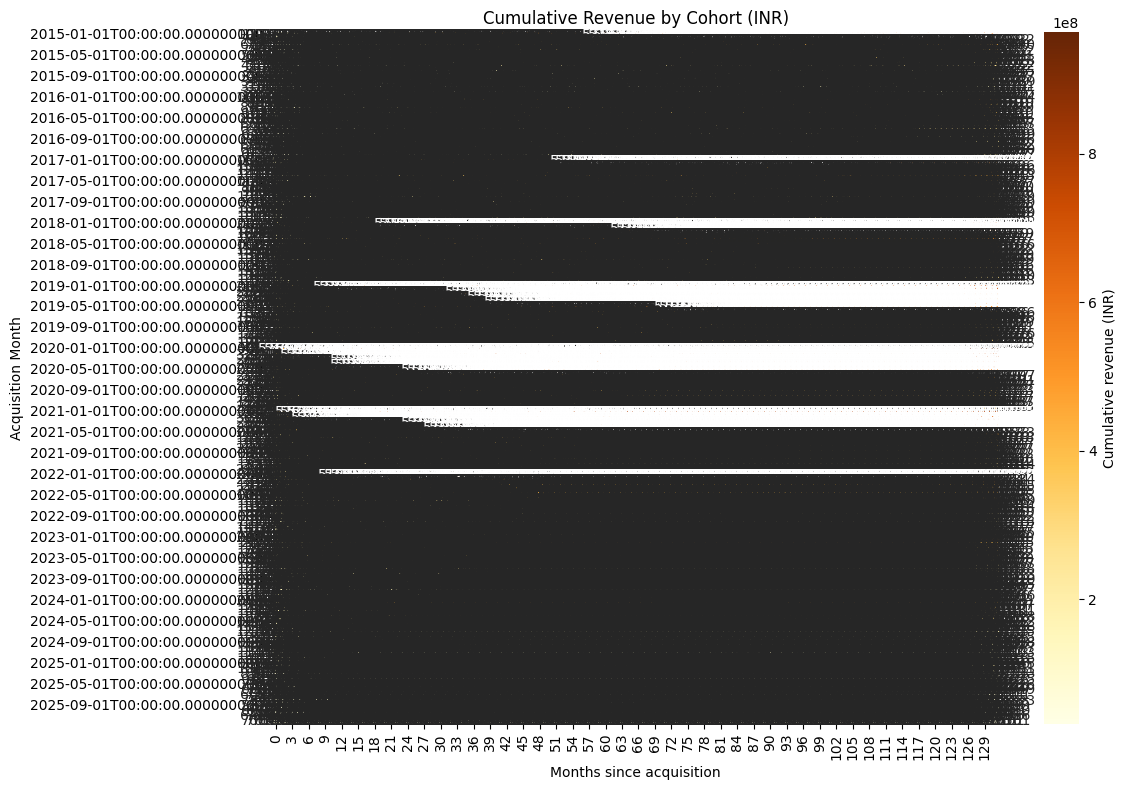

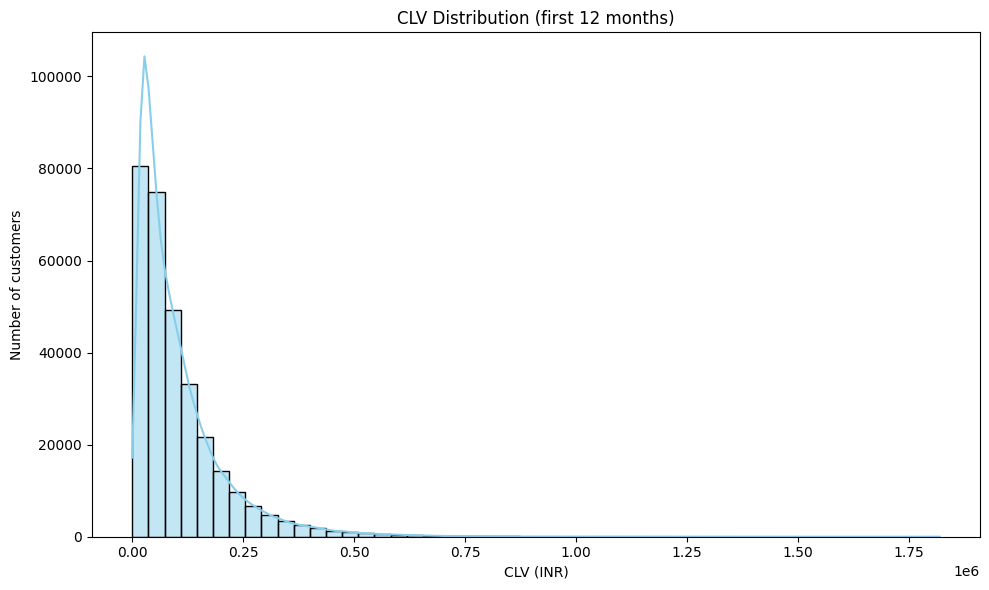

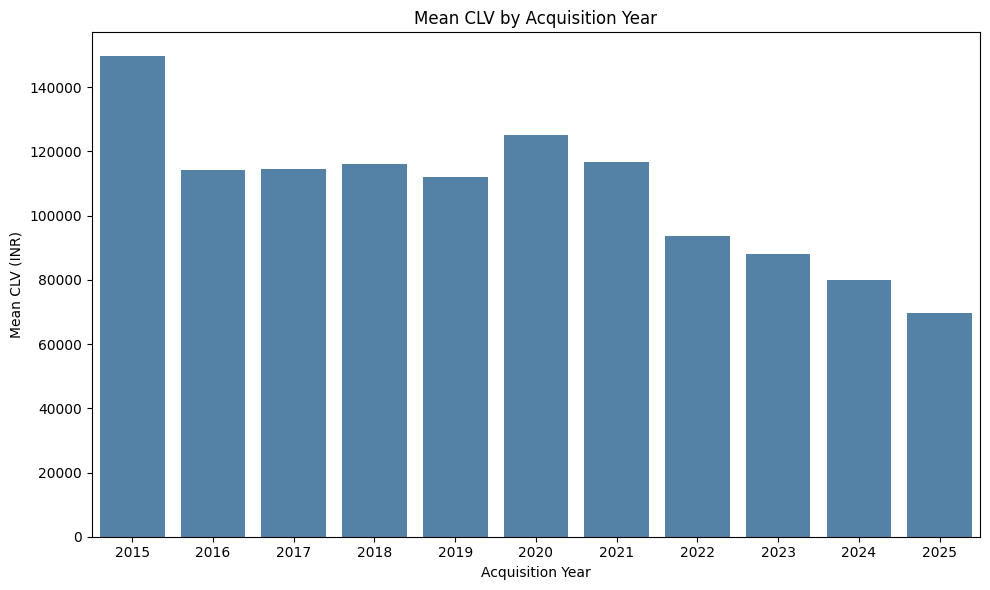


CLV by customer_tier:
   customer_tier           mean   median   count
0         Metro  117687.453273  82753.0  147430
1         Rural   70368.780614  48026.5   14846
2         Tier1  100989.148149  70053.0   95573
3         Tier2   86353.541386  59366.5   50258


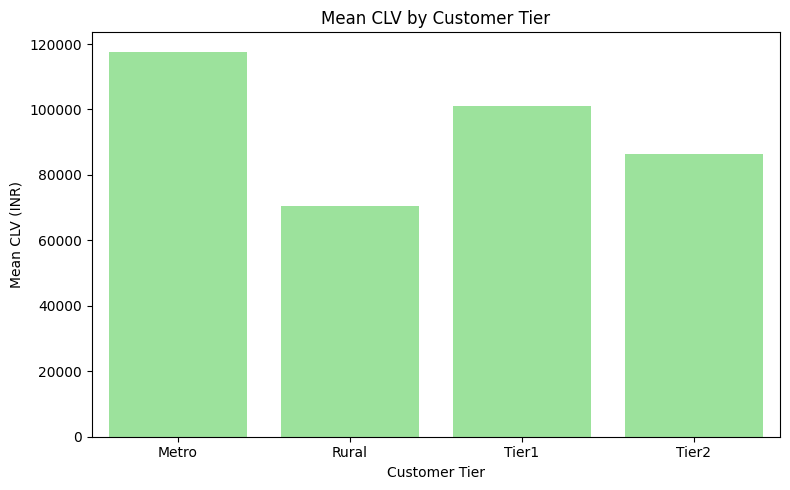

C:\Users\Alagu\AppData\Local\Temp\ipykernel_13432\105748606.py:168: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  retention_all = cohort_customers.groupby('cohort_index').apply(lambda g: (g['n_customers'].sum()) / (cohort_customers[cohort_customers['cohort_index']==0]['n_customers'].sum())).reset_index(name='fraction_of_initial_customers')


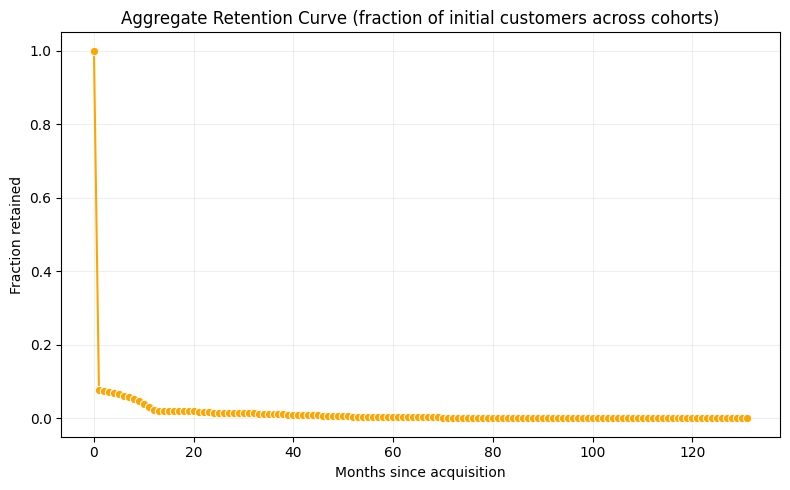


Saved: retention matrix, cohort revenue files, CLV per customer and charts with prefix: clv_cohort
Sample CLV (head):
          customer_id  clv_12  acq_month  acq_year customer_tier  \
0  CUST_2015_00000001   53212 2015-09-01      2015         Metro   
1  CUST_2015_00000002  268260 2015-07-01      2015         Rural   
2  CUST_2015_00000003  180744 2015-01-01      2015         Metro   
3  CUST_2015_00000004  176147 2015-02-01      2015         Metro   
4  CUST_2015_00000005  127210 2015-01-01      2015         Tier1   

  is_prime_member  age_group_label customer_state  
0              No                2    Maharashtra  
1              No                3  Uttar Pradesh  
2              No                2      Karnataka  
3              No                5    Maharashtra  
4              No                2      Rajasthan  


In [27]:
DATE_COL = 'order_date'
AMOUNT_COL = 'final_amount_inr'
CUST_COL = 'customer_id'
HORIZON_MONTHS = 12   # CLV horizon (months) - change as desired
OUTPUT_PREFIX = "clv_cohort"

# ---- Load & basic cleaning ----
df = pd.read_csv(CSV_PATH, parse_dates=[DATE_COL])
# normalize column names (safe)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Required columns check
required = {CUST_COL, DATE_COL, AMOUNT_COL}
missing = required - set(df.columns)
if missing:
    raise KeyError(f"Missing required columns: {missing}")

# keep only relevant columns (if extra segment cols exist, they will be used later)
keep_cols = [CUST_COL, DATE_COL, AMOUNT_COL] + [c for c in ['customer_tier','is_prime_member','age_group_label','customer_state'] if c in df.columns]
df = df[keep_cols].copy()

# Ensure amounts numeric
df[AMOUNT_COL] = pd.to_numeric(df[AMOUNT_COL], errors='coerce')
df = df.dropna(subset=[CUST_COL, DATE_COL, AMOUNT_COL])

# Convert to month period for cohorting
df['order_month'] = df[DATE_COL].dt.to_period('M').dt.to_timestamp()
# Customer acquisition month = first order month
first_order = df.groupby(CUST_COL)[DATE_COL].min().reset_index().rename(columns={DATE_COL: 'first_order_date'})
first_order['acq_month'] = first_order['first_order_date'].dt.to_period('M').dt.to_timestamp()
# merge back
df = df.merge(first_order[[CUST_COL, 'first_order_date', 'acq_month']], on=CUST_COL, how='left')

# Add cohort index = months since acquisition (0 = acquisition month)
df['cohort_index'] = ((df['order_month'].dt.year - df['acq_month'].dt.year) * 12 +
                      (df['order_month'].dt.month - df['acq_month'].dt.month)).astype(int)

# ---- Cohort: retention matrix (customers) ----
# unique customers per cohort and each month
cohort_customers = (
    df.groupby(['acq_month', 'cohort_index'])[CUST_COL]
      .nunique()
      .reset_index(name='n_customers')
)

# cohort size (month 0 per acq_month)
cohort_sizes = cohort_customers[cohort_customers['cohort_index'] == 0][['acq_month','n_customers']].rename(columns={'n_customers':'cohort_size'})

cohort_customers = cohort_customers.merge(cohort_sizes, on='acq_month', how='left')
cohort_customers['retention_pct'] = (cohort_customers['n_customers'] / cohort_customers['cohort_size']) * 100

# pivot retention matrix (rows = acq_month, cols = cohort_index)
retention_pivot = cohort_customers.pivot(index='acq_month', columns='cohort_index', values='retention_pct').fillna(0)

# Save retention table
retention_pivot.to_csv(f"{OUTPUT_PREFIX}_retention_matrix.csv")

# ---- Plot retention heatmap ----
plt.figure(figsize=(12,8))
sns.heatmap(retention_pivot, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label':'Retention %'})
plt.title('Cohort Retention (% of customers active)')
plt.ylabel('Acquisition Month')
plt.xlabel('Months since acquisition')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig(f"{OUTPUT_PREFIX}_retention_heatmap.png", dpi=150)
plt.show()

# ---- Retention curves: show first N cohorts as lineplot ----
top_cohorts = retention_pivot.sort_index().head(12)  # change if you want different cohorts
plt.figure(figsize=(10,6))
for idx, (acq, row) in enumerate(top_cohorts.iterrows()):
    plt.plot(row.index, row.values, marker='o', label=acq.strftime('%Y-%m'))
plt.title('Retention Curves (first 12 cohorts)')
plt.xlabel('Months since acquisition')
plt.ylabel('Retention (%)')
plt.legend(loc='upper right', ncol=2, fontsize='small')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.savefig(f"{OUTPUT_PREFIX}_retention_curves.png", dpi=150)
plt.show()

# ---- Cohort revenue & cumulative revenue per cohort ----
cohort_revenue = (
    df.groupby(['acq_month','cohort_index'])[AMOUNT_COL]
      .sum()
      .reset_index(name='revenue')
)

cohort_revenue_pivot = cohort_revenue.pivot(index='acq_month', columns='cohort_index', values='revenue').fillna(0)
cohort_revenue_cum = cohort_revenue_pivot.cumsum(axis=1)  # cumulative revenue per cohort across months

cohort_revenue_pivot.to_csv(f"{OUTPUT_PREFIX}_cohort_revenue_monthly.csv")
cohort_revenue_cum.to_csv(f"{OUTPUT_PREFIX}_cohort_revenue_cumulative.csv")

# Plot cumulative revenue heatmap (monetary)
plt.figure(figsize=(12,8))
sns.heatmap(cohort_revenue_cum, annot=True, fmt='.0f', cmap='YlOrBr', cbar_kws={'label':'Cumulative revenue (INR)'})
plt.title('Cumulative Revenue by Cohort (INR)')
plt.ylabel('Acquisition Month')
plt.xlabel('Months since acquisition')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig(f"{OUTPUT_PREFIX}_cohort_cumrev_heatmap.png", dpi=150)
plt.show()

# ---- Compute CLV per customer over chosen horizon (HORIZON_MONTHS) ----
# Keep only orders within horizon since first order
df['months_since_first'] = df['cohort_index']
df_horizon = df[df['months_since_first'] < HORIZON_MONTHS].copy()

clv_by_customer = (
    df_horizon.groupby(CUST_COL)[AMOUNT_COL].sum().reset_index().rename(columns={AMOUNT_COL:'clv_' + str(HORIZON_MONTHS)})
)

# Attach acquisition year and segments if present
clv_by_customer = clv_by_customer.merge(first_order[[CUST_COL,'acq_month']], on=CUST_COL, how='left')
clv_by_customer['acq_year'] = clv_by_customer['acq_month'].dt.year

# If segment columns exist in original df, attach mode value per customer
segment_cols = [c for c in ['customer_tier','is_prime_member','age_group_label','customer_state'] if c in df.columns]
if segment_cols:
    segs = df.groupby(CUST_COL)[segment_cols].agg(lambda x: x.mode().iat[0] if not x.mode().empty else np.nan).reset_index()
    clv_by_customer = clv_by_customer.merge(segs, on=CUST_COL, how='left')

# Save CLV table
clv_by_customer.to_csv(f"{OUTPUT_PREFIX}_by_customer.csv", index=False)

# ---- CLV distribution ----
plt.figure(figsize=(10,6))
sns.histplot(clv_by_customer.iloc[:,1], bins=50, kde=True, color='skyblue')  # second column is CLV
plt.title(f'CLV Distribution (first {HORIZON_MONTHS} months)')
plt.xlabel('CLV (INR)')
plt.ylabel('Number of customers')
plt.tight_layout()
plt.savefig(f"{OUTPUT_PREFIX}_clv_distribution.png", dpi=150)
plt.show()

# ---- CLV by acquisition year ----
clv_by_year = clv_by_customer.groupby('acq_year')[clv_by_customer.columns[1]].agg(['mean','median','count']).reset_index()
clv_by_year.columns = ['acq_year','mean_clv','median_clv','num_customers']
clv_by_year.to_csv(f"{OUTPUT_PREFIX}_clv_by_year.csv", index=False)

plt.figure(figsize=(10,6))
sns.barplot(data=clv_by_year, x='acq_year', y='mean_clv', color='steelblue')
plt.title('Mean CLV by Acquisition Year')
plt.xlabel('Acquisition Year')
plt.ylabel('Mean CLV (INR)')
plt.tight_layout()
plt.savefig(f"{OUTPUT_PREFIX}_mean_clv_by_year.png", dpi=150)
plt.show()

# ---- CLV by segment (example: customer_tier) ----
if 'customer_tier' in clv_by_customer.columns:
    clv_tier = clv_by_customer.groupby('customer_tier')[clv_by_customer.columns[1]].agg(['mean','median','count']).reset_index()
    print("\nCLV by customer_tier:\n", clv_tier)
    clv_tier.to_csv(f"{OUTPUT_PREFIX}_clv_by_tier.csv", index=False)
    plt.figure(figsize=(8,5))
    sns.barplot(data=clv_tier, x='customer_tier', y='mean', color='lightgreen')
    plt.title('Mean CLV by Customer Tier')
    plt.ylabel('Mean CLV (INR)')
    plt.xlabel('Customer Tier')
    plt.tight_layout()
    plt.savefig(f"{OUTPUT_PREFIX}_clv_by_tier.png", dpi=150)
    plt.show()

# ---- Retention curve aggregated: fraction retained by month across all cohorts ----
retention_all = cohort_customers.groupby('cohort_index').apply(lambda g: (g['n_customers'].sum()) / (cohort_customers[cohort_customers['cohort_index']==0]['n_customers'].sum())).reset_index(name='fraction_of_initial_customers')
plt.figure(figsize=(8,5))
sns.lineplot(data=retention_all, x='cohort_index', y='fraction_of_initial_customers', marker='o', color='orange')
plt.title('Aggregate Retention Curve (fraction of initial customers across cohorts)')
plt.xlabel('Months since acquisition')
plt.ylabel('Fraction retained')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.savefig(f"{OUTPUT_PREFIX}_aggregate_retention.png", dpi=150)
plt.show()

# ---- Quick summary prints ----
print("\nSaved: retention matrix, cohort revenue files, CLV per customer and charts with prefix:", OUTPUT_PREFIX)
print("Sample CLV (head):")
print(clv_by_customer.head())

  discount_band  total_revenue  total_quantity  avg_discount  num_orders
0         0-10%    27069592346          411611      0.815403      366929
1        10-20%     5800021681          104697     16.053415       93439
2        20-30%     6062715662          122201     25.352526      108809
3        30-40%     1977721922           46239     35.531720       41189
4        40-50%     1673492663           46546     45.518027       41465
5          50%+     2376208822           90456     60.254129       80597


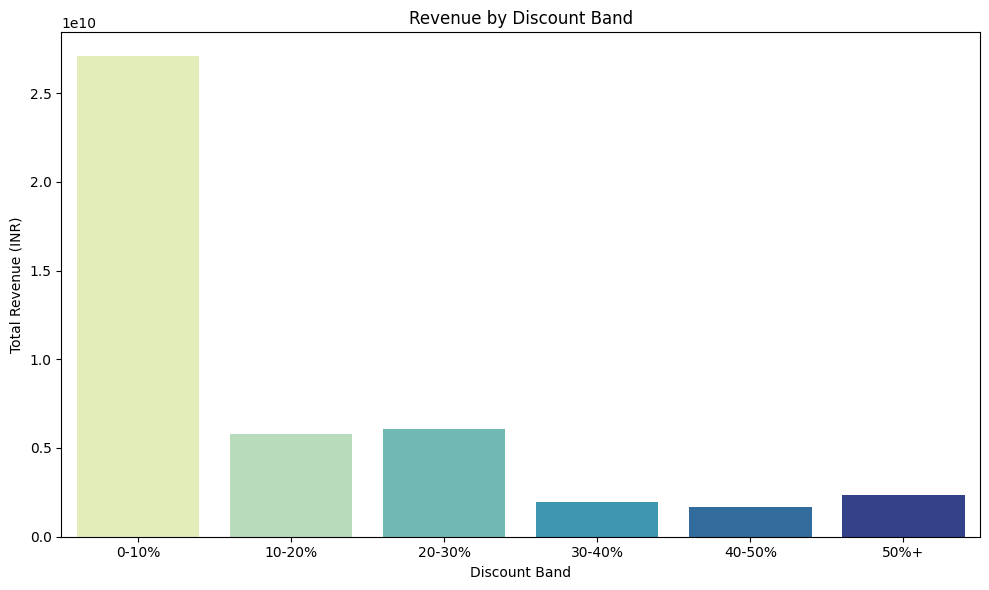

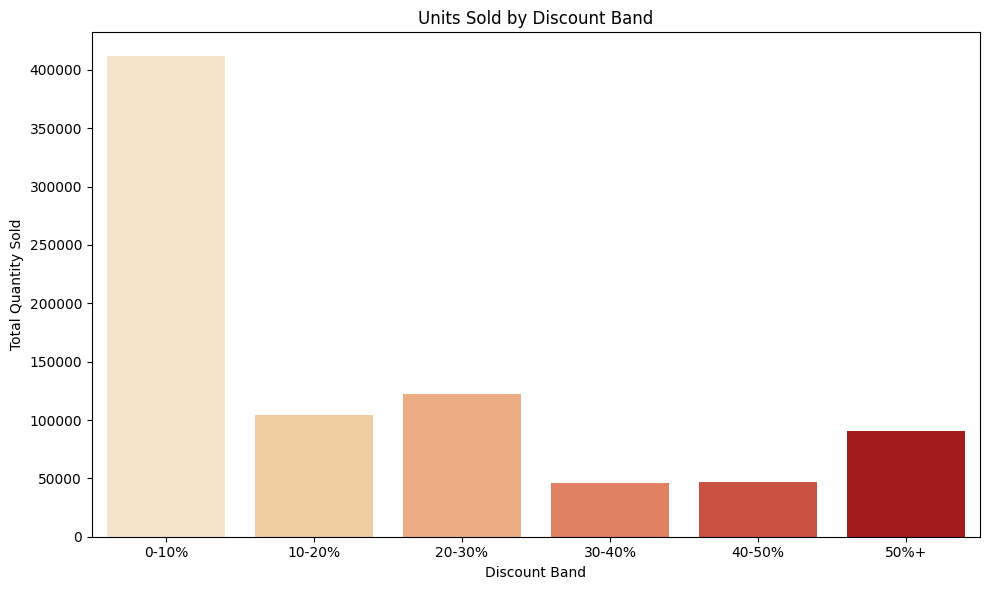

Correlation between Discount % and Revenue: -0.26
Correlation between Discount % and Quantity Sold: 0.00


C:\Users\Alagu\AppData\Local\Temp\ipykernel_13432\3350777449.py:69: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_discount = df.groupby(['category','discount_band']).agg(


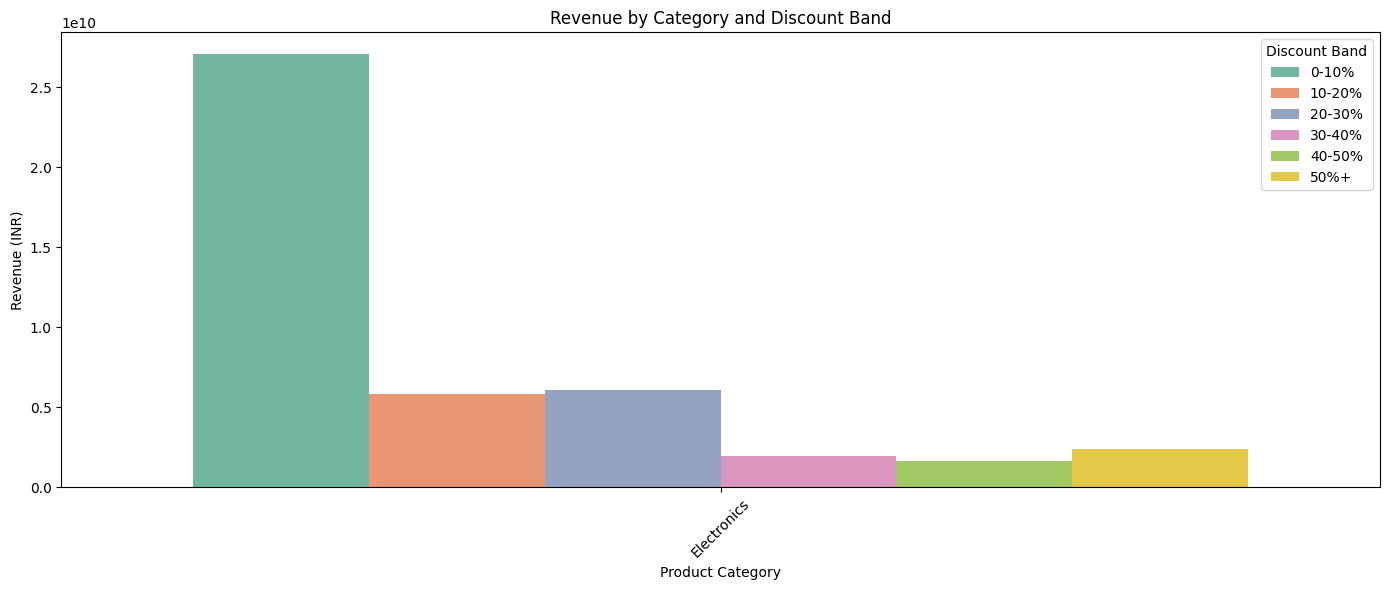

C:\Users\Alagu\AppData\Local\Temp\ipykernel_13432\3350777449.py:85: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_discount = df.groupby(['order_month','discount_band']).agg(


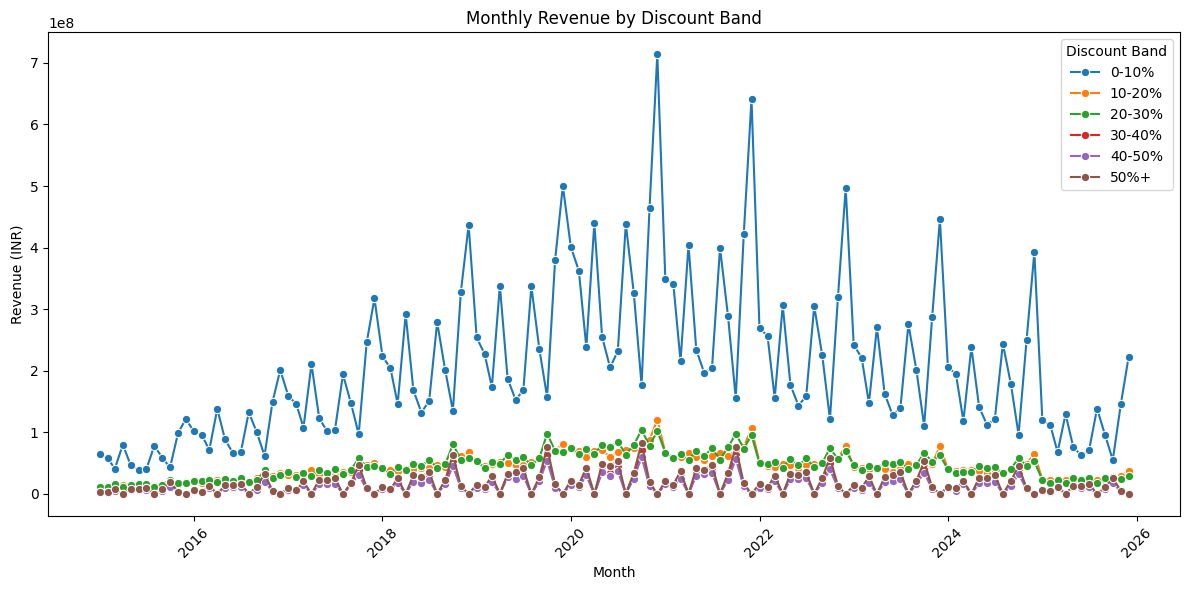

In [28]:
#############Discount-vs-revenue-effort
df = pd.read_csv(CSV_PATH, parse_dates=['order_date'])

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Ensure numeric
df['discount_percent'] = pd.to_numeric(df['discount_percent'], errors='coerce')
df['final_amount_inr'] = pd.to_numeric(df['final_amount_inr'], errors='coerce')
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')

# Drop rows with critical missing data
df = df.dropna(subset=['discount_percent','final_amount_inr','quantity','category','order_date'])

# Create discount bands for analysis
bins = [0, 10, 20, 30, 40, 50, 100]
labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50%+']
df['discount_band'] = pd.cut(df['discount_percent'], bins=bins, labels=labels, include_lowest=True)

# Aggregate metrics per discount band
discount_summary = df.groupby('discount_band', observed=True).agg(
    total_revenue=('final_amount_inr','sum'),
    total_quantity=('quantity','sum'),
    avg_discount=('discount_percent','mean'),
    num_orders=('final_amount_inr','count')
).reset_index()


print(discount_summary)

plt.figure(figsize=(10,6))
sns.barplot(
    data=discount_summary,
    x='discount_band',
    y='total_revenue',
    hue='discount_band',  # assign the x variable to hue
    dodge=False,          # optional, avoids bars splitting
    palette='YlGnBu',
    legend=False          # hide duplicate legend
)
plt.title('Revenue by Discount Band')
plt.xlabel('Discount Band')
plt.ylabel('Total Revenue (INR)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(
    data=discount_summary,
    x='discount_band',
    y='total_quantity',
    hue='discount_band',  # assign x variable to hue
    dodge=False,          # avoid splitting bars
    palette='OrRd',
    legend=False          # hide duplicate legend
)
plt.title('Units Sold by Discount Band')
plt.xlabel('Discount Band')
plt.ylabel('Total Quantity Sold')
plt.tight_layout()
plt.show()

corr_revenue = df['discount_percent'].corr(df['final_amount_inr'])
corr_quantity = df['discount_percent'].corr(df['quantity'])

print(f"Correlation between Discount % and Revenue: {corr_revenue:.2f}")
print(f"Correlation between Discount % and Quantity Sold: {corr_quantity:.2f}")

category_discount = df.groupby(['category','discount_band']).agg(
    revenue=('final_amount_inr','sum'),
    quantity=('quantity','sum')
).reset_index()

plt.figure(figsize=(14,6))
sns.barplot(data=category_discount, x='category', y='revenue', hue='discount_band', palette='Set2')
plt.title('Revenue by Category and Discount Band')
plt.xlabel('Product Category')
plt.ylabel('Revenue (INR)')
plt.xticks(rotation=45)
plt.legend(title='Discount Band')
plt.tight_layout()
plt.show()

df['order_month'] = df['order_date'].dt.to_period('M').dt.to_timestamp()
monthly_discount = df.groupby(['order_month','discount_band']).agg(
    revenue=('final_amount_inr','sum'),
    quantity=('quantity','sum')
).reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_discount, x='order_month', y='revenue', hue='discount_band', marker='o')
plt.title('Monthly Revenue by Discount Band')
plt.xlabel('Month')
plt.ylabel('Revenue (INR)')
plt.legend(title='Discount Band')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


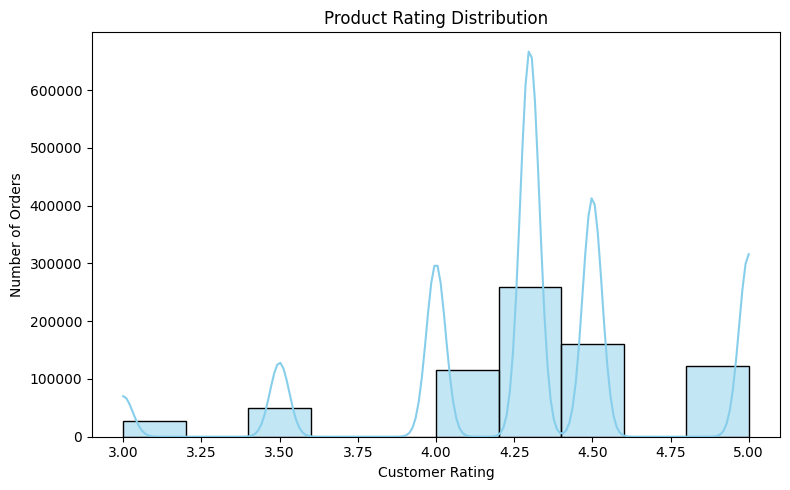

Correlation between Rating and Revenue: 0.051


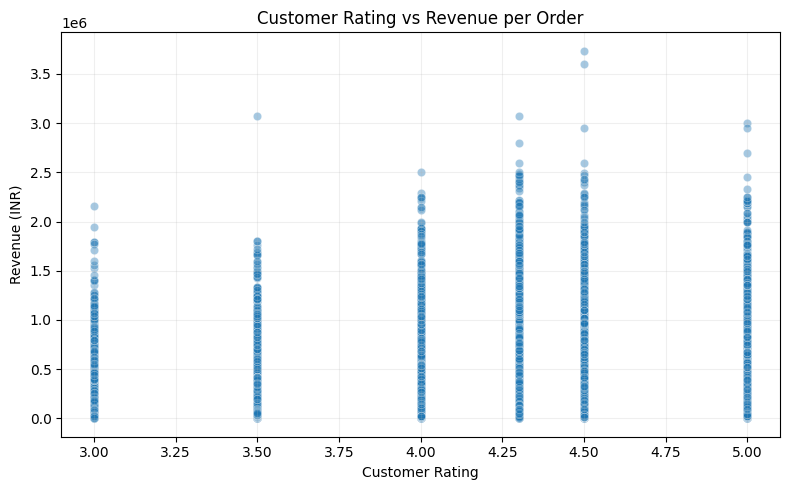

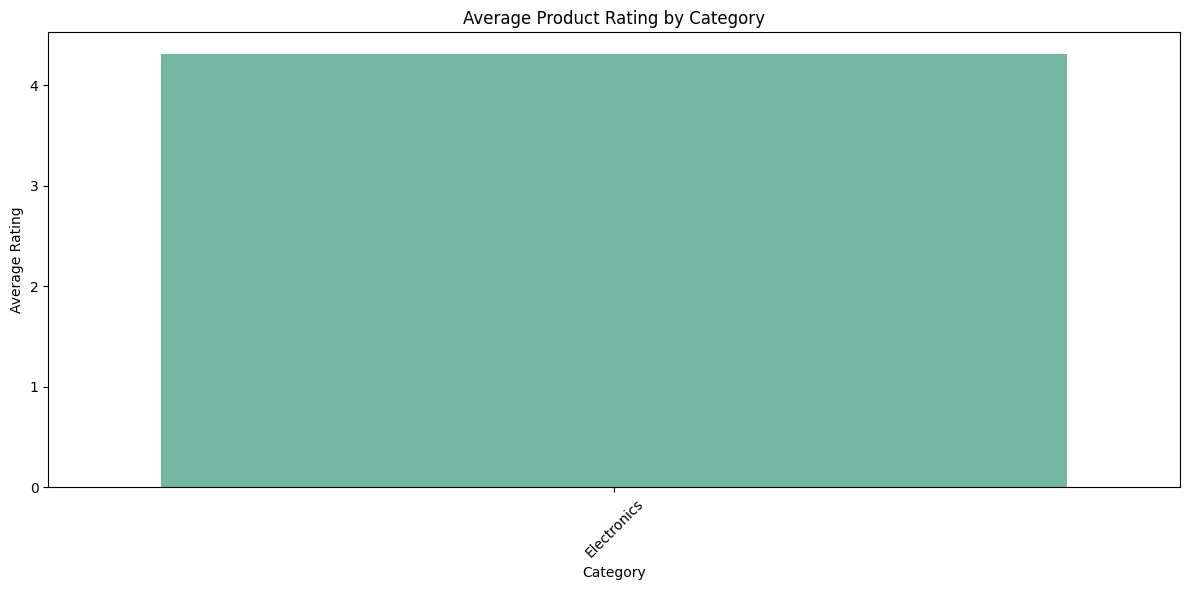

C:\Users\Alagu\AppData\Local\Temp\ipykernel_13432\2971430795.py:76: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_summary = df.groupby('rating_band').agg({


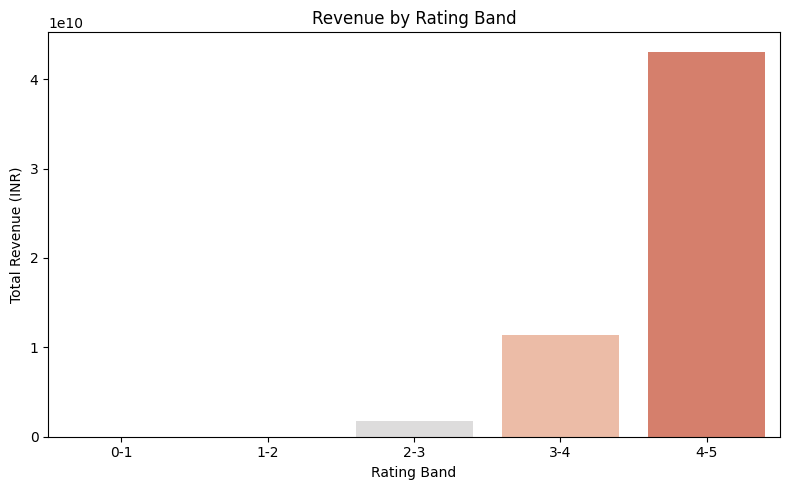

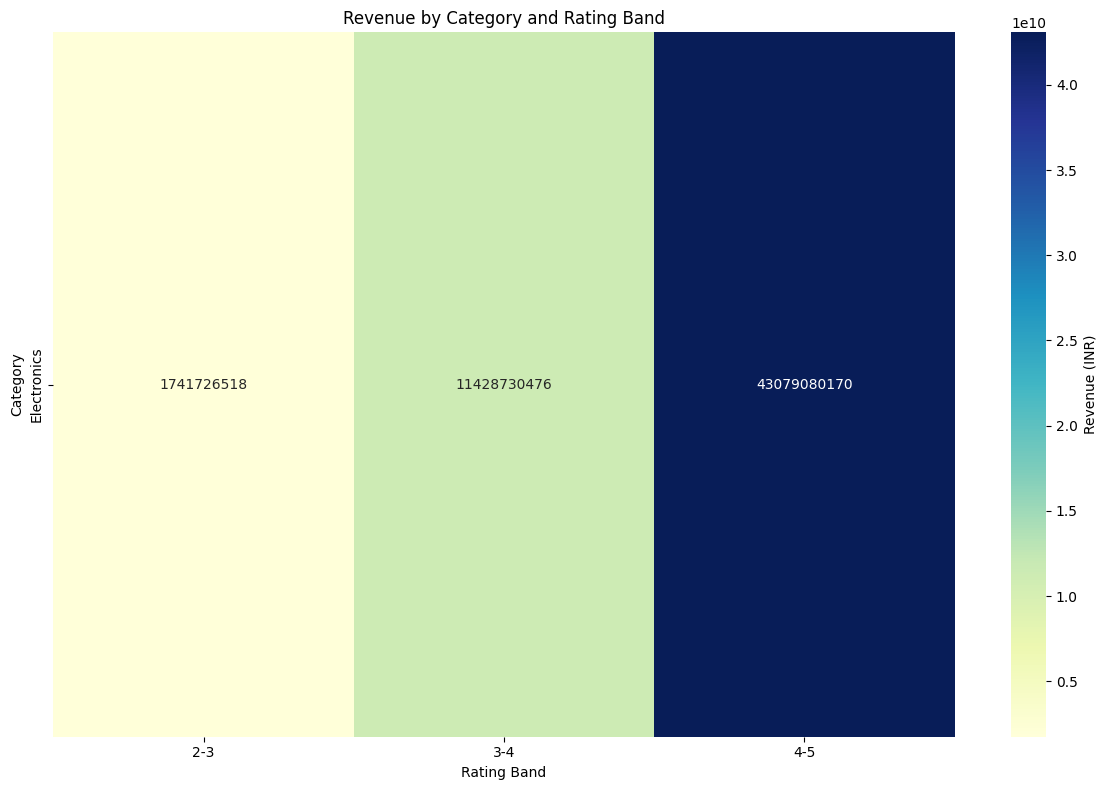

C:\Users\Alagu\AppData\Local\Temp\ipykernel_13432\2971430795.py:117: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_rating = df.groupby('price_band').agg({'customer_rating':'mean','total_revenue':'sum'}).reset_index()


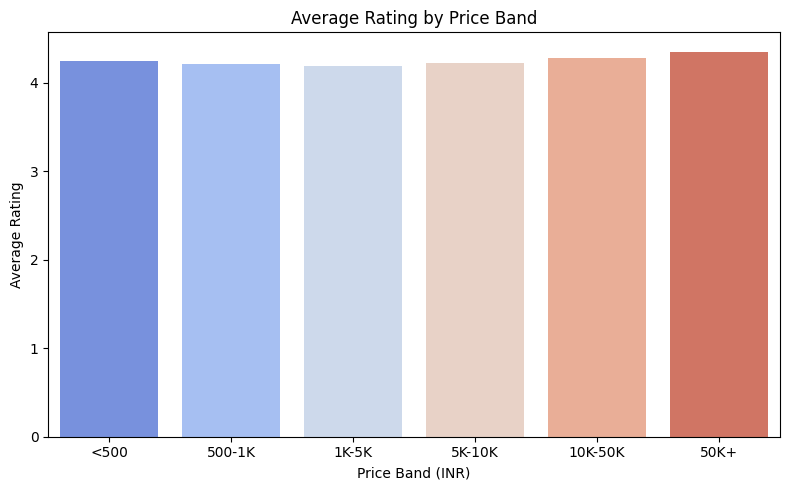

In [31]:
#####Product-rating vs revenue 
df = pd.read_csv(CSV_PATH, parse_dates=['order_date'])

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Required columns
required_cols = ['customer_rating', 'final_amount_inr', 'quantity', 'category', 'product_name']
missing = set(required_cols) - set(df.columns)
if missing:
    raise KeyError(f"Missing columns: {missing}")

# Ensure numeric types
df['customer_rating'] = pd.to_numeric(df['customer_rating'], errors='coerce')
df['final_amount_inr'] = pd.to_numeric(df['final_amount_inr'], errors='coerce')
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')

# Drop rows with null ratings or price
df = df.dropna(subset=['customer_rating', 'final_amount_inr', 'quantity'])

# ---- 1️⃣ Rating distribution ----
plt.figure(figsize=(8,5))
sns.histplot(df['customer_rating'], bins=10, kde=True, color='skyblue')
plt.title('Product Rating Distribution')
plt.xlabel('Customer Rating')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

# ---- 2️⃣ Correlation: Rating vs Revenue ----
df['total_revenue'] = df['final_amount_inr'] * df['quantity']
corr = df[['customer_rating', 'total_revenue']].corr().iloc[0,1]
print(f"Correlation between Rating and Revenue: {corr:.3f}")

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='customer_rating', y='total_revenue', alpha=0.4)
plt.title('Customer Rating vs Revenue per Order')
plt.xlabel('Customer Rating')
plt.ylabel('Revenue (INR)')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

# ---- 3️⃣ Average Rating per Category ----
cat_rating = df.groupby('category').agg({
    'customer_rating':'mean',
    'total_revenue':'sum',
    'product_name':'count'  # number of orders
}).reset_index()
cat_rating = cat_rating.sort_values('customer_rating', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(
    data=cat_rating,
    x='category',
    y='customer_rating',
    hue='category',   # assign hue
    palette='Set2',
    dodge=False,
    legend=False      # hide duplicate legend
)

plt.xticks(rotation=45)
plt.title('Average Product Rating by Category')
plt.ylabel('Average Rating')
plt.xlabel('Category')
plt.tight_layout()
plt.show()

# ---- 4️⃣ Average Revenue vs Rating Bins ----
# Create rating bins (0.5 intervals)
bins = [0, 1, 2, 3, 4, 5]
labels = ['0-1','1-2','2-3','3-4','4-5']
df['rating_band'] = pd.cut(df['customer_rating'], bins=bins, labels=labels, include_lowest=True)

rating_summary = df.groupby('rating_band').agg({
    'total_revenue':'sum',
    'product_name':'count'
}).reset_index().rename(columns={'product_name':'num_orders'})

plt.figure(figsize=(8,5))
sns.barplot(
    data=rating_summary,
    x='rating_band',
    y='total_revenue',
    hue='rating_band',   # assign hue
    palette='coolwarm',
    dodge=False,
    legend=False         # hide duplicate legend
)

plt.title('Revenue by Rating Band')
plt.xlabel('Rating Band')
plt.ylabel('Total Revenue (INR)')
plt.tight_layout()
plt.show()

# ---- 5️⃣ Heatmap: Category vs Rating Band Revenue ----
cat_rating_band = df.groupby(['category','rating_band'], observed=True).agg({'total_revenue':'sum'}).reset_index()

cat_pivot = cat_rating_band.pivot(index='category', columns='rating_band', values='total_revenue').fillna(0)

plt.figure(figsize=(12,8))
sns.heatmap(cat_pivot, annot=True, fmt='.0f', cmap='YlGnBu', cbar_kws={'label':'Revenue (INR)'})
plt.title('Revenue by Category and Rating Band')
plt.xlabel('Rating Band')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

# ---- 6️⃣ Price Range Analysis ----
# Define price bands
price_bins = [0, 500, 1000, 5000, 10000, 50000, df['final_amount_inr'].max()]
price_labels = ['<500','500-1K','1K-5K','5K-10K','10K-50K','50K+']
df['price_band'] = pd.cut(df['final_amount_inr'], bins=price_bins, labels=price_labels, include_lowest=True)

price_rating = df.groupby('price_band').agg({'customer_rating':'mean','total_revenue':'sum'}).reset_index()

plt.figure(figsize=(8,5))
sns.barplot(
    data=price_rating,
    x='price_band',
    y='customer_rating',
    hue='price_band',   # assign hue same as x
    palette='coolwarm',
    dodge=False,
    legend=False        # hide duplicate legend
)

plt.title('Average Rating by Price Band')
plt.xlabel('Price Band (INR)')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

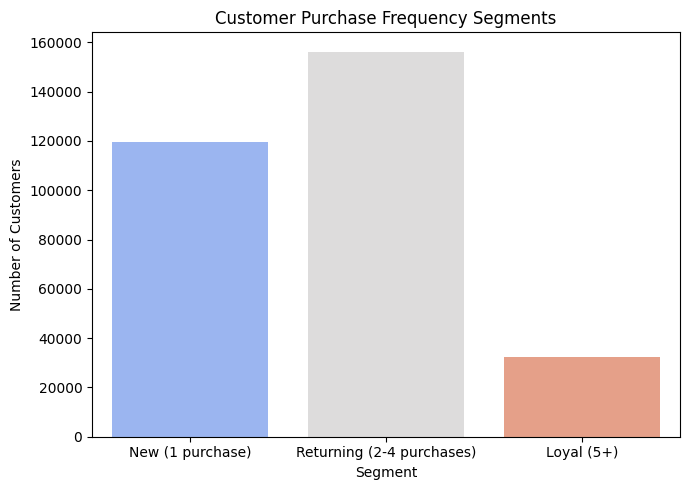

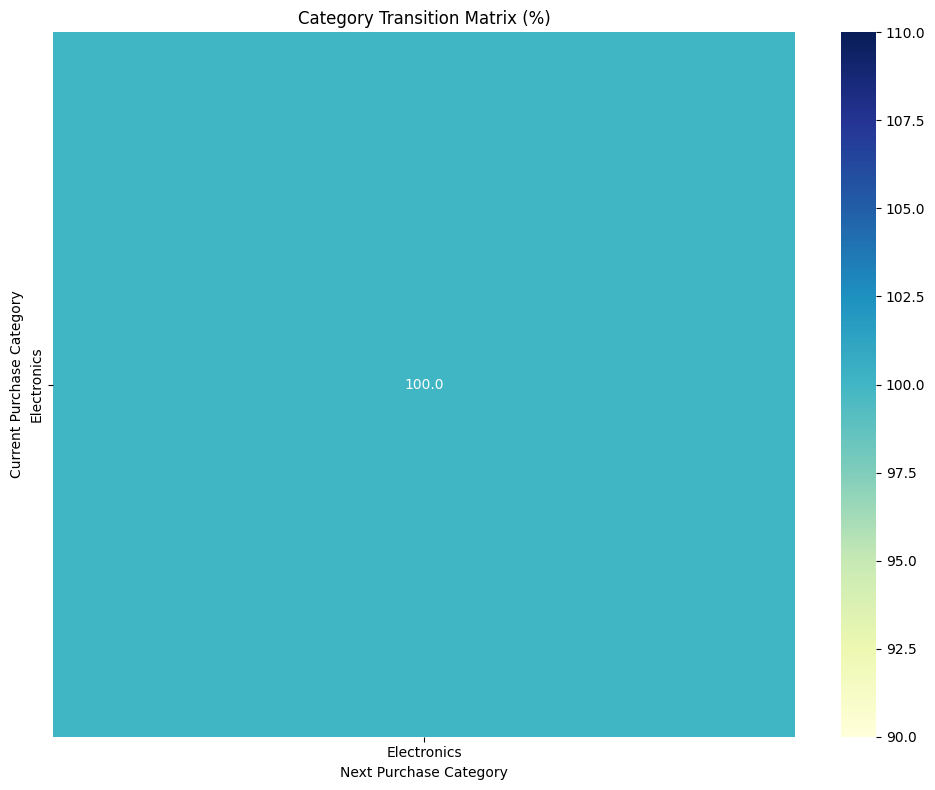

C:\Users\Alagu\AppData\Local\Temp\ipykernel_9812\1399290017.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customer_journey, x='loyalty_stage', y='days_between', palette='viridis')


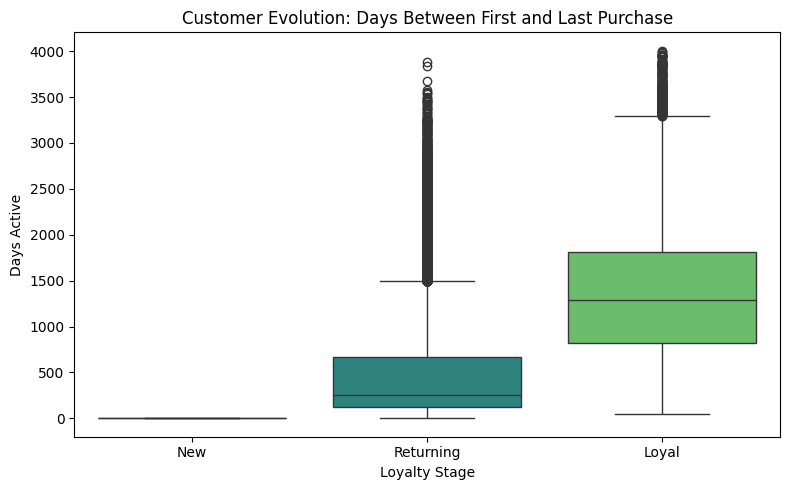

In [3]:
DATE_COL = 'order_date'
CUST_COL = 'customer_id'
CAT_COL = 'category'
AMOUNT_COL = 'final_amount_inr'

# ---- Load data ----
df = pd.read_csv(CSV_PATH, parse_dates=[DATE_COL])
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Keep required columns
df = df[[CUST_COL, DATE_COL, CAT_COL, AMOUNT_COL]].dropna()

# Sort by customer and date
df = df.sort_values([CUST_COL, DATE_COL])

# ---- Purchase frequency ----
purchase_freq = df.groupby(CUST_COL)[DATE_COL].count().reset_index(name='purchase_count')
purchase_freq['customer_segment'] = pd.cut(
    purchase_freq['purchase_count'],
    bins=[0,1,4,1000],
    labels=['New (1 purchase)', 'Returning (2-4 purchases)', 'Loyal (5+)']
)

plt.figure(figsize=(7,5))
sns.countplot(data=purchase_freq, x='customer_segment', hue='customer_segment', palette='coolwarm', legend=False)

plt.title('Customer Purchase Frequency Segments')
plt.ylabel('Number of Customers')
plt.xlabel('Segment')
plt.tight_layout()
plt.show()

# ---- Category transitions ----
# Get next category for each order
df['next_category'] = df.groupby(CUST_COL)[CAT_COL].shift(-1)
transitions = df.dropna(subset=['next_category'])
transition_matrix = pd.crosstab(transitions[CAT_COL], transitions['next_category'])
transition_matrix_percent = transition_matrix.div(transition_matrix.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10,8))
sns.heatmap(transition_matrix_percent, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Category Transition Matrix (%)")
plt.xlabel("Next Purchase Category")
plt.ylabel("Current Purchase Category")
plt.tight_layout()
plt.show()

## ---- Sankey Diagram (Category Flow) ----
#source = []
#target = []
#value = []
#
#for i, row in transitions.groupby([CAT_COL, 'next_category']).size().reset_index(name='count').iterrows():
#    source.append(row[CAT_COL])
#    target.append(row['next_category'])
#    value.append(row['count'])#
#
# Encode category names into indices
#all_labels = list(pd.unique(source + target))
#all_labels = pd.unique(pd.Series(source + target)).tolist()
#
#source_indices = [all_labels.index(s) for s in source]
#target_indices = [all_labels.index(t) for t in target]
#
#fig = go.Figure(data=[go.Sankey(
#    node=dict(label=all_labels, pad=15, thickness=20, color="skyblue"),
#    link=dict(source=source_indices, target=target_indices, value=value)
#)])
#fig.update_layout(title_text="Customer Category Transition Flow (Sankey Diagram)", font_size=10)
#fig.show()
#
# ---- Customer evolution ----
customer_journey = (
    df.groupby(CUST_COL)
      .agg(first_purchase=('order_date','min'),
           last_purchase=('order_date','max'),
           total_purchases=('order_date','count'),
           total_spent=('final_amount_inr','sum'))
      .reset_index()
)
customer_journey['days_between'] = (customer_journey['last_purchase'] - customer_journey['first_purchase']).dt.days
customer_journey['loyalty_stage'] = pd.cut(
    customer_journey['total_purchases'],
    bins=[0,1,4,1000],
    labels=['New','Returning','Loyal']
)

plt.figure(figsize=(8,5))
sns.boxplot(data=customer_journey, x='loyalty_stage', y='days_between', palette='viridis')
plt.title('Customer Evolution: Days Between First and Last Purchase')
plt.xlabel('Loyalty Stage')
plt.ylabel('Days Active')
plt.tight_layout()
plt.show()

C:\Users\Alagu\AppData\Local\Temp\ipykernel_9812\3250733968.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


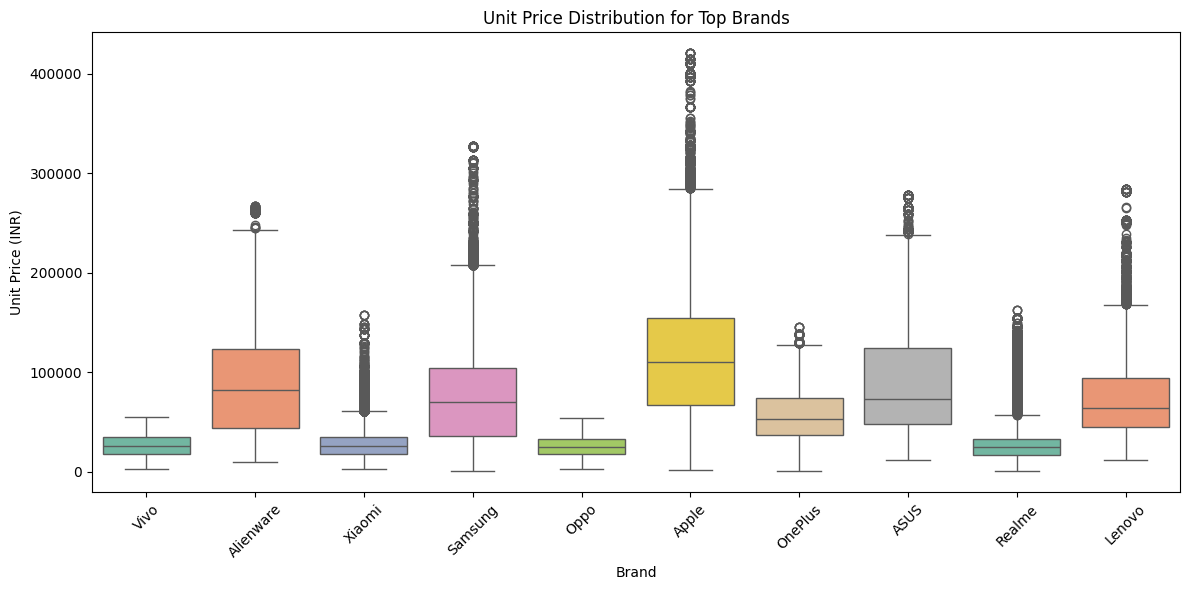

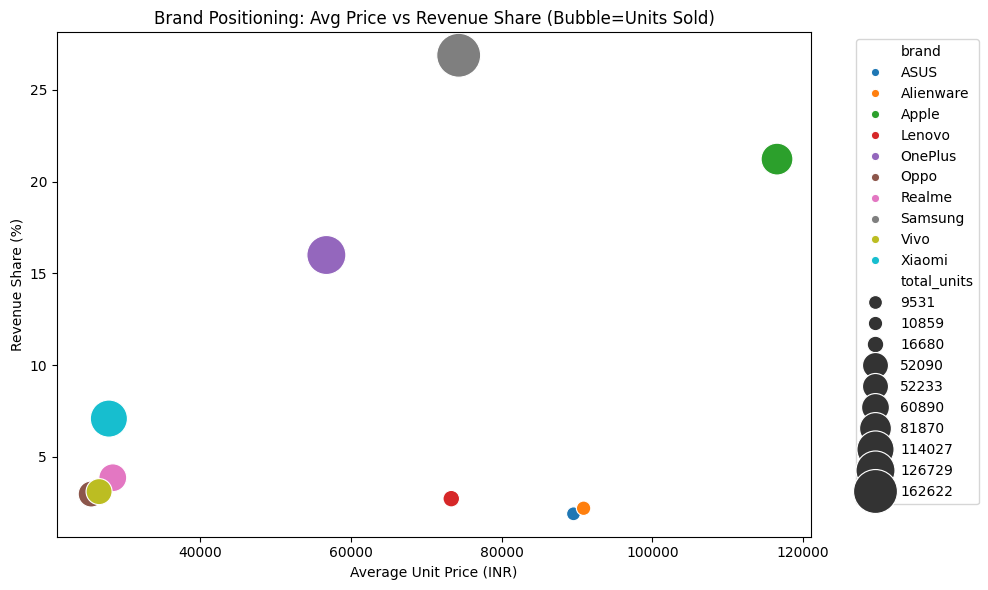

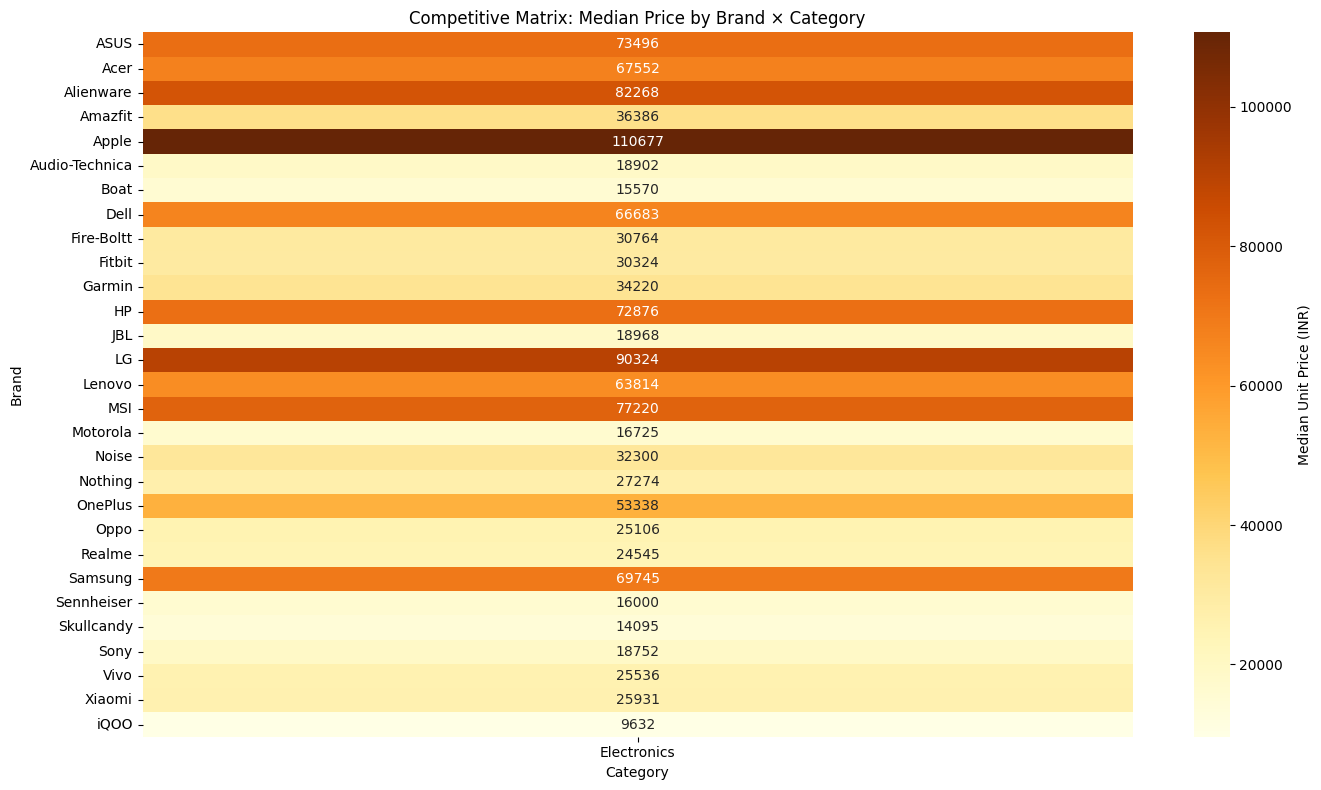

C:\Users\Alagu\AppData\Local\Temp\ipykernel_9812\3250733968.py:95: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_band_summary = df.groupby(['brand','price_band']).agg(


In [5]:
PRICE_COL = 'final_amount_inr'       # can also use discounted_price_inr
QTY_COL = 'quantity'
BRAND_COL = 'brand'
CATEGORY_COL = 'category'
OUTPUT_PREFIX = "competitive_pricing"

# ---- Load & clean data ----
df = pd.read_csv(CSV_PATH, parse_dates=['order_date'])
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Keep required columns
df = df[[BRAND_COL, CATEGORY_COL, PRICE_COL, QTY_COL]].dropna()

# Ensure numeric
df[PRICE_COL] = pd.to_numeric(df[PRICE_COL], errors='coerce')
df[QTY_COL] = pd.to_numeric(df[QTY_COL], errors='coerce')
df = df.dropna(subset=[PRICE_COL, QTY_COL])

# Compute unit price
df['unit_price'] = df[PRICE_COL] / df[QTY_COL]

# ---- Aggregate metrics per brand ----
brand_metrics = df.groupby(BRAND_COL).agg(
    avg_price=('unit_price','mean'),
    median_price=('unit_price','median'),
    price_std=('unit_price','std'),
    total_revenue=(PRICE_COL,'sum'),
    total_units=(QTY_COL,'sum')
).reset_index()

# Market share
brand_metrics['revenue_share_%'] = (brand_metrics['total_revenue']/brand_metrics['total_revenue'].sum()*100)

# Save brand metrics
brand_metrics.to_csv(f"{OUTPUT_PREFIX}_brand_metrics.csv", index=False)

# ---- Boxplot of price distribution by brand (top N brands) ----
top_brands = brand_metrics.sort_values('total_revenue', ascending=False).head(10)['brand'].tolist()
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df[df['brand'].isin(top_brands)],
    x='brand',
    y='unit_price',
    palette='Set2',   # <- here
    dodge=False
)

plt.title('Unit Price Distribution for Top Brands')
plt.xlabel('Brand')
plt.ylabel('Unit Price (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{OUTPUT_PREFIX}_boxplot_top_brands.png", dpi=150)
plt.show()

# ---- Brand positioning bubble chart ----
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=brand_metrics[brand_metrics['brand'].isin(top_brands)],
    x='avg_price',
    y='revenue_share_%',
    size='total_units',
    hue='brand',
    palette='tab10',
    legend='full',
    sizes=(100,1000)
)
plt.title('Brand Positioning: Avg Price vs Revenue Share (Bubble=Units Sold)')
plt.xlabel('Average Unit Price (INR)')
plt.ylabel('Revenue Share (%)')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.savefig(f"{OUTPUT_PREFIX}_brand_positioning.png", dpi=150)
plt.show()

# ---- Competitive matrix: median price per brand × category ----
brand_category = df.groupby([CATEGORY_COL, BRAND_COL]).agg(median_price=('unit_price','median')).reset_index()
pivot_matrix = brand_category.pivot(index=BRAND_COL, columns=CATEGORY_COL, values='median_price').fillna(0)
pivot_matrix.to_csv(f"{OUTPUT_PREFIX}_brand_category_matrix.csv")

plt.figure(figsize=(14,8))
sns.heatmap(pivot_matrix, annot=True, fmt=".0f", cmap='YlOrBr', cbar_kws={'label':'Median Unit Price (INR)'})
plt.title('Competitive Matrix: Median Price by Brand × Category')
plt.ylabel('Brand')
plt.xlabel('Category')
plt.tight_layout()
plt.savefig(f"{OUTPUT_PREFIX}_brand_category_heatmap.png", dpi=150)
plt.show()

# ---- Optional: price tiers ----
price_bins = [0, 500, 1000, 5000, 10000, df['unit_price'].max()]
price_labels = ['<500','500-1K','1K-5K','5K-10K','10K+']
df['price_band'] = pd.cut(df['unit_price'], bins=price_bins, labels=price_labels, include_lowest=True)

price_band_summary = df.groupby(['brand','price_band']).agg(
    total_units=('quantity','sum'),
    total_revenue=('final_amount_inr','sum')
).reset_index()
price_band_summary.to_csv(f"{OUTPUT_PREFIX}_brand_price_band_summary.csv", index=False)

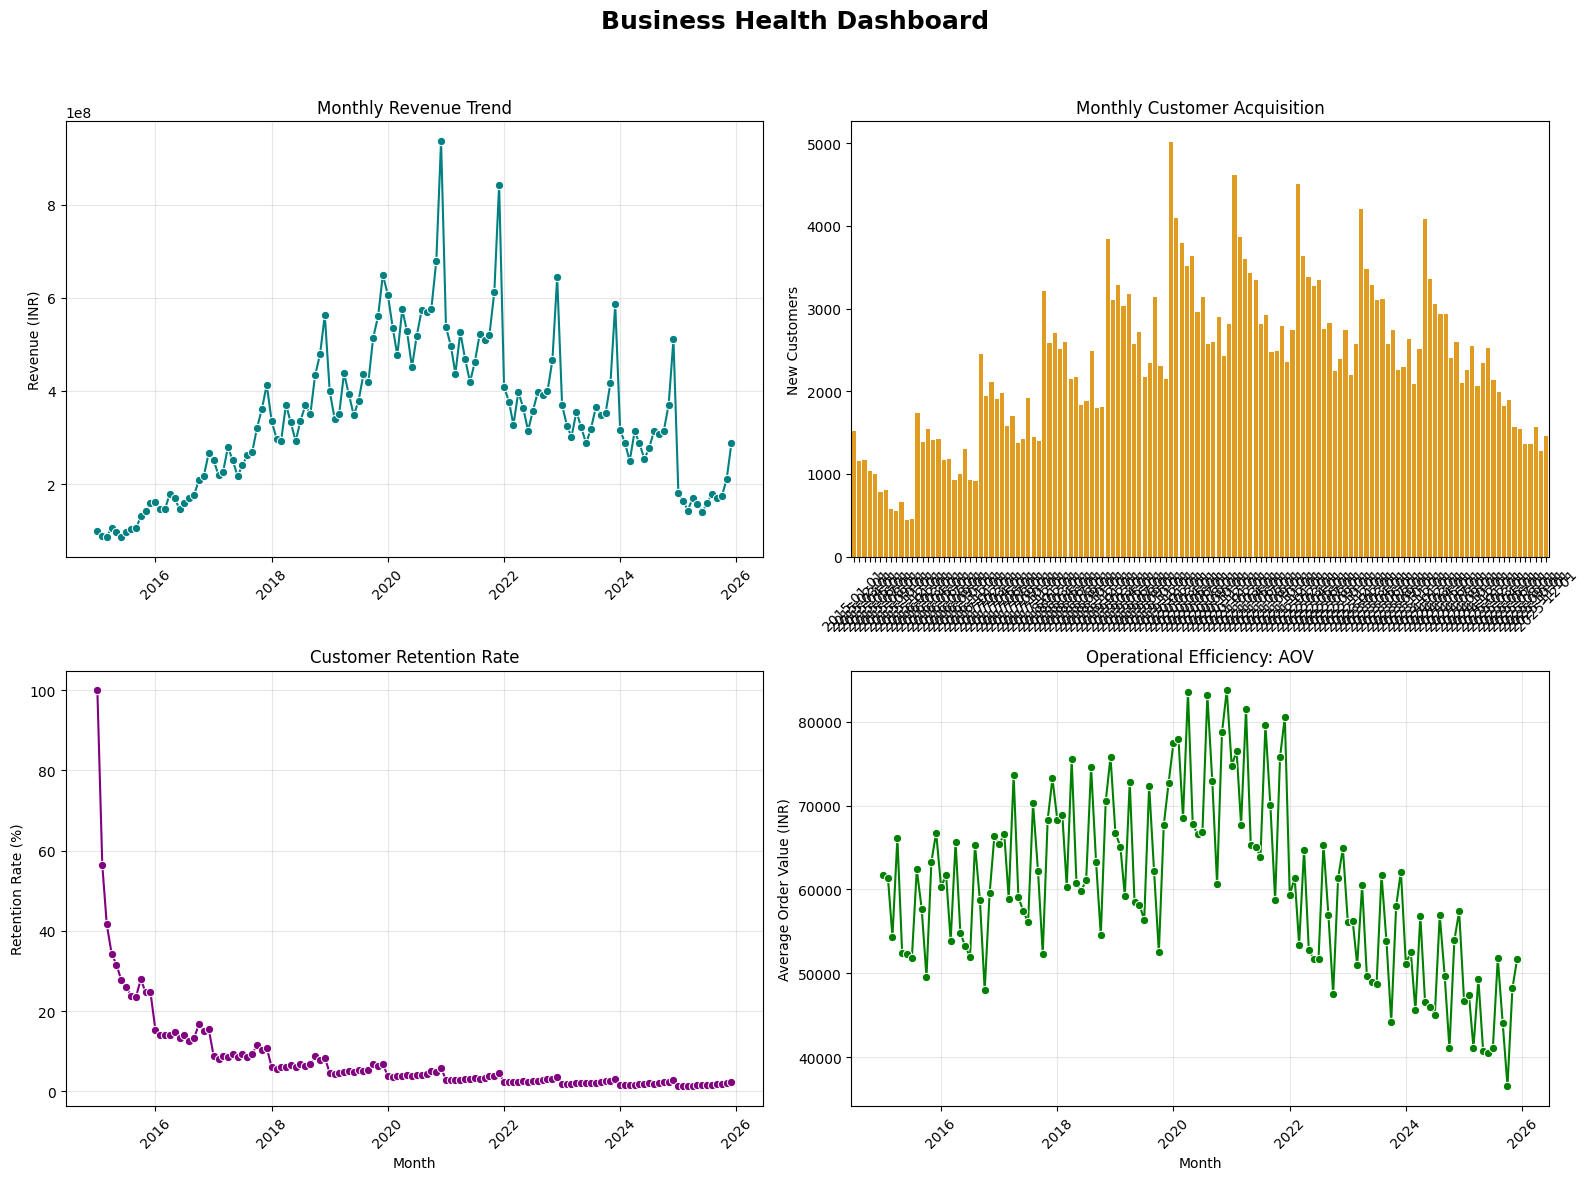


📊 Executive Summary:
Total Revenue: INR 44,959,753,096
Total Customers: 308107
Average Retention Rate: 8.04%
Average Order Value: INR 60234.77


In [6]:
DATE_COL = 'order_date'
CUST_COL = 'customer_id'
AMOUNT_COL = 'final_amount_inr'

# ---- LOAD DATA ----
df = pd.read_csv(CSV_PATH, parse_dates=[DATE_COL])
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df = df[[DATE_COL, CUST_COL, AMOUNT_COL]].dropna()

# ---- PREPARE METRICS ----
df['order_month'] = df[DATE_COL].dt.to_period('M').dt.to_timestamp()
df['order_year'] = df[DATE_COL].dt.year

# Revenue Growth
monthly_revenue = df.groupby('order_month')[AMOUNT_COL].sum().reset_index()
monthly_revenue['revenue_mom_growth_%'] = monthly_revenue[AMOUNT_COL].pct_change()*100

# Customer Acquisition
first_purchase = df.groupby(CUST_COL)[DATE_COL].min().reset_index()
first_purchase['acq_month'] = first_purchase[DATE_COL].dt.to_period('M').dt.to_timestamp()
monthly_acq = first_purchase.groupby('acq_month')[CUST_COL].nunique().reset_index(name='new_customers')

# Retention Rate (simple)
df['cohort_month'] = df.groupby(CUST_COL)[DATE_COL].transform('min').dt.to_period('M').dt.to_timestamp()
cohort_counts = df.groupby(['cohort_month','order_month'])[CUST_COL].nunique().reset_index(name='active_customers')
cohort_size = cohort_counts[cohort_counts['cohort_month'] == cohort_counts['order_month']][['cohort_month','active_customers']].rename(columns={'active_customers':'cohort_size'})
cohort_counts = cohort_counts.merge(cohort_size, on='cohort_month')
cohort_counts['retention_rate_%'] = (cohort_counts['active_customers']/cohort_counts['cohort_size'])*100

# Operational Efficiency: Average Order Value (AOV)
monthly_aov = df.groupby('order_month')[AMOUNT_COL].mean().reset_index(name='avg_order_value')

# ---- DASHBOARD PLOTS ----
plt.figure(figsize=(16,12))
plt.suptitle('Business Health Dashboard', fontsize=18, fontweight='bold')

# 1️⃣ Revenue Growth
plt.subplot(2,2,1)
sns.lineplot(data=monthly_revenue, x='order_month', y=AMOUNT_COL, marker='o', color='teal')
plt.ylabel('Revenue (INR)')
plt.xlabel('')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

# 2️⃣ Customer Acquisition
plt.subplot(2,2,2)
sns.barplot(data=monthly_acq, x='acq_month', y='new_customers', color='orange')
plt.ylabel('New Customers')
plt.xlabel('')
plt.title('Monthly Customer Acquisition')
plt.xticks(rotation=45)

# 3️⃣ Retention Rate
plt.subplot(2,2,3)
# Average retention per cohort month offset
retention_avg = cohort_counts.groupby('order_month')['retention_rate_%'].mean().reset_index()
sns.lineplot(data=retention_avg, x='order_month', y='retention_rate_%', marker='o', color='purple')
plt.ylabel('Retention Rate (%)')
plt.xlabel('Month')
plt.title('Customer Retention Rate')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

# 4️⃣ Operational Efficiency (AOV)
plt.subplot(2,2,4)
sns.lineplot(data=monthly_aov, x='order_month', y='avg_order_value', marker='o', color='green')
plt.ylabel('Average Order Value (INR)')
plt.xlabel('Month')
plt.title('Operational Efficiency: AOV')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

# ---- EXECUTIVE SUMMARY (printed) ----
total_revenue = df[AMOUNT_COL].sum()
total_customers = df[CUST_COL].nunique()
avg_retention = retention_avg['retention_rate_%'].mean()
avg_aov = monthly_aov['avg_order_value'].mean()

print("\n📊 Executive Summary:")
print(f"Total Revenue: INR {total_revenue:,.0f}")
print(f"Total Customers: {total_customers}")
print(f"Average Retention Rate: {avg_retention:.2f}%")
print(f"Average Order Value: INR {avg_aov:.2f}")